In [1]:
# import mplhep
import sys

import seaborn as sns

import numpy as np
import pandas as pd
import uproot
from matplotlib import pyplot as plt

In [2]:
plt.rcParams.update({
    "axes.labelsize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 16,
    "figure.titlesize": 20
})

In [3]:
pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 200000)

In [4]:
sys.path.append("/home/belle2/amubarak/Ds2D0enue_Analysis/07-Python_Functions/")

# Prep-Work

### Import Data

Correct Charge

In [5]:
import os
import uproot
import pandas as pd
from tqdm import tqdm

# === Load only selected branches ===
with open("/home/belle2/amubarak/Ds2D0enue_Analysis/03-Grid/Save_var.txt") as f:
    variables_to_load = [
        line.strip().strip(",").strip('"').strip("'")
        for line in f
        if line.strip() and not line.strip().startswith("#")
    ]

# Ensure BDT variable is included
if "Ds_FakeD0BDT" not in variables_to_load:
    variables_to_load.append("Ds_FakeD0BDT")

# Make sure Ds_BkgBDT is included
if "Ds_BkgBDT" not in variables_to_load:
    variables_to_load.append("Ds_BkgBDT")

# === Sample list ===
samples = ["Signal", "BB", "ccbar", "ddbar", "ssbar", "taupair", "uubar"]
GenEvents = samples.copy()

# === Input configuration for BkgBDT ===
Date = "0530"
Attempt = "0"
input_dir = "/group/belle/users/amubarak/03-ML/BkgBDT/"

# === Load ROOT files into DataFrames ===
DataFrames = {}

for s in tqdm(samples, desc="Loading ROOT files"):
    if s == "Signal":
        file_path = os.path.join(input_dir, "Ds2D0enu-Signal_withBkgBDT.root")
    else:
        file_path = os.path.join(
            input_dir, f"Ds2D0e-Generic_Ds_{Date}25_{Attempt}_{s}_withBkgBDT.root"
        )

    df = uproot.concatenate(
        f"{file_path}:Dstree",
        filter_name=variables_to_load,
        library="pd"
    )

    print(f"✔️ Loaded {file_path} with {len(df):,} entries")
    DataFrames[s] = df

# === Define combined background ===
background_samples = ["BB", "ccbar", "ddbar", "ssbar", "taupair", "uubar"]
DataFrames["All"] = pd.concat([DataFrames[s] for s in background_samples], ignore_index=True)

# === Combine uds backgrounds for convenience ===
DataFrames["uds"] = pd.concat(
    [DataFrames["uubar"], DataFrames["ddbar"], DataFrames["ssbar"]],
    ignore_index=True
)

Loading ROOT files:  14%|█▍        | 1/7 [00:02<00:14,  2.36s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT/Ds2D0enu-Signal_withBkgBDT.root with 170,685 entries


Loading ROOT files:  29%|██▊       | 2/7 [00:02<00:05,  1.17s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT/Ds2D0e-Generic_Ds_053025_0_BB_withBkgBDT.root with 12,961 entries


Loading ROOT files:  43%|████▎     | 3/7 [00:14<00:24,  6.12s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT/Ds2D0e-Generic_Ds_053025_0_ccbar_withBkgBDT.root with 1,125,245 entries


Loading ROOT files:  57%|█████▋    | 4/7 [00:15<00:11,  3.89s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT/Ds2D0e-Generic_Ds_053025_0_ddbar_withBkgBDT.root with 20,714 entries


Loading ROOT files:  71%|███████▏  | 5/7 [00:15<00:05,  2.73s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT/Ds2D0e-Generic_Ds_053025_0_ssbar_withBkgBDT.root with 39,862 entries


Loading ROOT files:  86%|████████▌ | 6/7 [00:16<00:01,  1.89s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT/Ds2D0e-Generic_Ds_053025_0_taupair_withBkgBDT.root with 1,470 entries


Loading ROOT files: 100%|██████████| 7/7 [00:17<00:00,  2.46s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT/Ds2D0e-Generic_Ds_053025_0_uubar_withBkgBDT.root with 91,694 entries


Wrong Charge

In [6]:
import os
import uproot
import pandas as pd
from tqdm import tqdm

# === Load only selected branches ===
with open("/home/belle2/amubarak/Ds2D0enue_Analysis/03-Grid/Save_var.txt") as f:
    variables_to_load = [
        line.strip().strip(",").strip('"').strip("'")
        for line in f
        if line.strip() and not line.strip().startswith("#")
    ]

# Ensure BDT variable is included
if "Ds_FakeD0BDT" not in variables_to_load:
    variables_to_load.append("Ds_FakeD0BDT")

# Ensure Ds_BkgBDT is included
if "Ds_BkgBDT" not in variables_to_load:
    variables_to_load.append("Ds_BkgBDT")

# === Wrong-charge sample list ===
samples_WCh = [
    "Signal_WCh", "BB_WCh", "ccbar_WCh",
    "ddbar_WCh", "ssbar_WCh", "taupair_WCh",
    "uubar_WCh", "Data_WCh"
]

# === Input configuration for WCh ===
Date = "0630"
Attempt = "0"
input_dir = "/group/belle/users/amubarak/03-ML/BkgBDT_WCh/"

# === Load ROOT files into DataFrames ===
# DataFrames = {}

for s in tqdm(samples_WCh, desc="Loading WCh"):
    if s == "Signal_WCh":
        file_path = os.path.join(input_dir, "Ds2D0enu-Signal_WCh_withBkgBDT.root")
    else:
        tag = s.replace("_WCh", "")
        file_path = os.path.join(
            input_dir, f"Ds2D0e-Generic_Ds_{Date}25_{Attempt}_{tag}_withBkgBDT.root"
        )

    df = uproot.concatenate(
        f"{file_path}:Dstree",
        filter_name=variables_to_load,
        library="pd"
    )

    print(f"✔️ Loaded {file_path} with {len(df):,} entries")
    DataFrames[s] = df

# === Define combined background for WCh ===
background_samples = [
    "BB_WCh", "ccbar_WCh", "ddbar_WCh",
    "ssbar_WCh", "taupair_WCh", "uubar_WCh"
]
DataFrames["All_WCh"] = pd.concat([DataFrames[s] for s in background_samples], ignore_index=True)

# === Combine uds backgrounds for convenience ===
DataFrames["uds_WCh"] = pd.concat(
    [DataFrames["uubar_WCh"], DataFrames["ddbar_WCh"], DataFrames["ssbar_WCh"]],
    ignore_index=True
)


Loading WCh:  12%|█▎        | 1/8 [00:00<00:03,  2.28it/s]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT_WCh/Ds2D0enu-Signal_WCh_withBkgBDT.root with 17,473 entries


Loading WCh:  25%|██▌       | 2/8 [00:00<00:02,  2.69it/s]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT_WCh/Ds2D0e-Generic_Ds_063025_0_BB_withBkgBDT.root with 11,843 entries


Loading WCh:  38%|███▊      | 3/8 [00:09<00:20,  4.14s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT_WCh/Ds2D0e-Generic_Ds_063025_0_ccbar_withBkgBDT.root with 850,705 entries


Loading WCh:  50%|█████     | 4/8 [00:09<00:10,  2.66s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT_WCh/Ds2D0e-Generic_Ds_063025_0_ddbar_withBkgBDT.root with 20,173 entries


Loading WCh:  62%|██████▎   | 5/8 [00:10<00:05,  1.95s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT_WCh/Ds2D0e-Generic_Ds_063025_0_ssbar_withBkgBDT.root with 42,053 entries


Loading WCh:  75%|███████▌  | 6/8 [00:10<00:02,  1.37s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT_WCh/Ds2D0e-Generic_Ds_063025_0_taupair_withBkgBDT.root with 1,416 entries


Loading WCh:  88%|████████▊ | 7/8 [00:11<00:01,  1.29s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT_WCh/Ds2D0e-Generic_Ds_063025_0_uubar_withBkgBDT.root with 94,602 entries


Loading WCh: 100%|██████████| 8/8 [00:14<00:00,  1.79s/it]

✔️ Loaded /group/belle/users/amubarak/03-ML/BkgBDT_WCh/Ds2D0e-Generic_Ds_063025_0_Data_withBkgBDT.root with 307,598 entries


Simulation

In [7]:
# # Modes
# DataFrames["Mode_1"] =  uproot.concatenate("/home/belle2/amubarak/C01-Simulated_Events/Dstar0/Dstar0-Background_Mode_1.root:Dstree",library='pd')
# DataFrames["Mode_2"] =  uproot.concatenate("/home/belle2/amubarak/C01-Simulated_Events/Dstar0/Dstar0-Background_Mode_2.root:Dstree",library='pd')
# DataFrames["Mode_3"] =  uproot.concatenate("/home/belle2/amubarak/C01-Simulated_Events/Dstar0/Dstar0-Background_Mode_3.root:Dstree",library='pd')

The line below is to look at the available variables.

In [8]:
print(DataFrames.keys())

dict_keys(['Signal', 'BB', 'ccbar', 'ddbar', 'ssbar', 'taupair', 'uubar', 'All', 'uds', 'Signal_WCh', 'BB_WCh', 'ccbar_WCh', 'ddbar_WCh', 'ssbar_WCh', 'taupair_WCh', 'uubar_WCh', 'Data_WCh', 'All_WCh', 'uds_WCh'])


In [9]:
DataFrames["All"].columns.tolist()

['__experiment__',
 '__run__',
 '__event__',
 '__candidate__',
 '__ncandidates__',
 'e_isCurl',
 'e_isTruthCurl',
 'e_angleToClosestInList_e_gen',
 'e_closestInList_e_gen_mcPDG',
 'e_closestInList_e_gen_genMotherPDG',
 'e_closestInList_e_gen_pt',
 'e_closestInList_e_gen_px',
 'e_closestInList_e_gen_py',
 'e_closestInList_e_gen_pz',
 'e_closestInList_pi_gen_mcPDG',
 'e_closestInList_pi_gen_genMotherPDG',
 'e_closestInList_pi_gen_pt',
 'e_closestInList_pi_gen_px',
 'e_closestInList_pi_gen_py',
 'e_closestInList_pi_gen_pz',
 'e_clusterE1E9',
 'e_clusterE9E21',
 'e_chi2',
 'e_ndf',
 'e_trackTime',
 'e_pionID',
 'e_electronID',
 'e_binaryPID_11_211',
 'e_omega',
 'e_daughter_0_isCloneTrack',
 'e_flightTime',
 'e_formula_E_p',
 'e_mcVirtual',
 'e_isMisidentified',
 'e_pminusptrue_p',
 'e_pminusptrue_old',
 'e_mcMother_E',
 'e_mcMother_p',
 'e_mcMother_mcDecayVertexFromIPDistance',
 'e_mcMother_nMCDaughters',
 'e_mcMother_mcDaughter_0_p',
 'e_mcMother_mcDaughter_1_p',
 'e_mcMother_mcDaughter_

## Setup

In [10]:
# BDT
#-------------------
for key in DataFrames.keys():
    DataFrames[key] = DataFrames[key].loc[DataFrames[key]["Ds_BkgBDT"] >= 0.7]

# # Vertex Fit
# #----------------
# for key in DataFrames.keys():
#     DataFrames[key] = DataFrames[key].loc[DataFrames[key]["Ds_chiProb_Ds_rank"] == 1]

# Photon Conversion
#-------------------
# DataFrames["Signal"] = DataFrames["Signal"][DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=0.1]
# DataFrames["ccbar"] = DataFrames["ccbar"][DataFrames["ccbar"]['Ds_gammaveto_M_Correction']>=0.1]
# DataFrames["All"] = DataFrames["All"][DataFrames["All"]['Ds_gammaveto_M_Correction']>=0.1]

# Peaking Background Removal
#----------------------------
# DataFrames["All"] = DataFrames["All"][(DataFrames["All"]['Ds_diff_D0pi']>=0.15)]
# DataFrames["Signal"] = DataFrames["Signal"][(DataFrames["Signal"]['Ds_diff_D0pi']>=0.15)]

# # Vertex Fitting
# #----------------
# DataFrames["Signal"] = DataFrames["Signal"][DataFrames["Signal"]['Ds_chiProb']>=0.01]
# DataFrames["All"] = DataFrames["All"][DataFrames["All"]['Ds_chiProb']>=0.01]

# Dalitz Removal
#----------------------------
# DataFrames["All"] = DataFrames["All"][(DataFrames["All"]['Ds_pi0veto_M_Correction']<=0.08) | (DataFrames["All"]['Ds_pi0veto_M_Correction']>=0.16)]
# DataFrames["Signal"] = DataFrames["Signal"][(DataFrames["Signal"]['Ds_pi0veto_M_Correction']<=0.08) | (DataFrames["Signal"]['Ds_pi0veto_M_Correction']>=0.16)]

# D0 Invariant Mass
#-----------------------
# DataFrames["Signal"] = DataFrames["Signal"][(DataFrames["Signal"]['Ds_D0_sideband']==1)]
# DataFrames["ccbar"] = DataFrames["ccbar"][(DataFrames["ccbar"]['Ds_D0_sideband']==1)]
# DataFrames["All"] = DataFrames["All"][(DataFrames["All"]['Ds_D0_sideband']==1)]

# Pure Sample
# ----------------
# DataFrames["Signal"] = DataFrames["Signal"][(abs(DataFrames["Signal"]["Ds_mcPDG"])==423)]
# DataFrames["ccbar"] = DataFrames["ccbar"][(abs(DataFrames["ccbar"]["Ds_mcPDG"])==423)]
# DataFrames["All"] = DataFrames["All"][(abs(DataFrames["All"]["Ds_mcPDG"])==423)]

# # PXD Hits
# # ----------------
# DataFrames["Signal"] = DataFrames["Signal"][(DataFrames["Signal"]['e_nPXDHits']>0)]
# DataFrames["All"] = DataFrames["All"][(DataFrames["All"]['e_nPXDHits']>0)]

# # Fake D^0
# # ----------------
# DataFrames["Signal"] = DataFrames["Signal"][(DataFrames["Signal"]["Ds_extraInfo_FastBDT"]>=0.58)]
# DataFrames["All"] = DataFrames["All"][(DataFrames["All"]["Ds_extraInfo_FastBDT"]>=0.58)]

### $D^{*+}$ BDT Cut

In [11]:
# cut_low = 0.142
# cut_high = 0.15

# # Apply sideband cut to 'All' sample
# DataFrames["All"] = DataFrames["All"][
#     (DataFrames["All"]["Ds_diff_D0pi"] <= cut_low) | (DataFrames["All"]["Ds_diff_D0pi"] >= cut_high)
# ]

# # Apply sideband cut to each generator-level sample
# for s in GenEvents:
#     DataFrames[s] = DataFrames[s][
#         (DataFrames[s]["Ds_diff_D0pi"] <= cut_low) | (DataFrames[s]["Ds_diff_D0pi"] >= cut_high)
#     ]

# Decay Modes

## $D^{*0} \rightarrow D^{0} [\pi^0 \rightarrow \gamma [\gamma \rightarrow e^{+} e^{-}]]$

In [12]:
print(DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==3)]['e_mcSecPhysProc'].value_counts(dropna=False))
print(DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==3)]['e_genMotherPDG'].value_counts(dropna=False))

e_mcSecPhysProc
16.0     14887
0.0       7783
201.0      659
121.0       17
2.0          5
151.0        3
Name: count, dtype: int64
e_genMotherPDG
 22.0       14886
 111.0       4608
 310.0        837
-421.0        763
 211.0        413
 421.0        364
 221.0        285
-211.0        223
 113.0        142
-431.0        137
 223.0        128
-411.0         78
 323.0         62
 411.0         59
-4122.0        45
 431.0         42
-3122.0        35
 331.0         31
 321.0         28
-323.0         22
 213.0         17
 130.0         17
-313.0         15
 3122.0        15
 4122.0        13
-321.0         12
-20213.0       12
 20213.0        8
-213.0          7
 313.0          6
-413.0          5
 333.0          5
 10323.0        4
 3212.0         4
-2212.0         4
-10323.0        3
-11.0           2
-3312.0         2
-3112.0         2
-3314.0         2
-2112.0         1
 3222.0         1
-2114.0         1
 15.0           1
 11.0           1
 413.0          1
-4232.0         1
 2114.0

In [13]:
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==3)]['e_mcMother_mcDaughter_0_PDG'].value_counts(dropna=False))
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==3)]['e_mcMother_mcDaughter_1_PDG'].value_counts(dropna=False))
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==3)]['e_mcMother_mcDaughter_2_PDG'].value_counts(dropna=False))

e_mcMother_mcDaughter_0_PDG
 321.0      8
-321.0      7
 313.0      4
-211.0      3
 22.0       2
 310.0      2
 421.0      2
-313.0      2
 311.0      2
 11.0       1
 221.0      1
 14.0       1
 323.0      1
-421.0      1
 211.0      1
-20313.0    1
-311.0      1
Name: count, dtype: int64
e_mcMother_mcDaughter_1_PDG
 11.0     12
 211.0    11
-11.0     10
-211.0     4
-13.0      1
-12.0      1
 111.0     1
Name: count, dtype: int64
e_mcMother_mcDaughter_2_PDG
-12.0     12
 12.0      8
 NaN       7
 11.0      3
-211.0     3
 211.0     3
 111.0     2
 16.0      1
 22.0      1
Name: count, dtype: int64


In [14]:
Stacked = True
Density = False
Bins = 50
var = 'Ds_massDifference_0'
# var = 'Ds_diff_D0pi'
Range = [0.0,0.25]
Hits = -1
perBin = ((Range[1] - Range[0])/Bins)*1000
print("Width Per Bin: {width:.2f} MeV".format(width = perBin))

label1= r'$isSignal(D^{*0})=1$'
label2= r'$isSignal(D^{*0})=0$'
label3= r'$NaN$'

labels=[label1,label2,label3]
colors=['#fd7f6f','#7eb0d5','purple']

data = [DataFrames["Mode_1"][(DataFrames["Mode_1"]['Ds_isSignal']==1) & ((DataFrames["Mode_1"]['Ds_gammaveto_M'])>=0.1)][var],
        DataFrames["Mode_1"][(DataFrames["Mode_1"]['Ds_isSignal']==0) & ((DataFrames["Mode_1"]['Ds_gammaveto_M'])>=0.1)][var],
        DataFrames["Mode_1"][(DataFrames["Mode_1"]['Ds_isSignal'].isna()) & ((DataFrames["Mode_1"]['Ds_gammaveto_M'])>=0.1)][var]
       ]


plt.hist(data[::-1], color=colors[::-1], label=labels[::-1], alpha=1, range=Range, stacked=Stacked, linewidth=2, density=Density, bins=Bins, histtype='step')

# Title
#---------
plt.title(r'$\bf Simulation$', loc = "right")
plt.title(r'$D^{*0} \rightarrow D^{0} [\pi^0 \rightarrow \gamma_{mis} [\gamma \rightarrow e^{+} e_{mis}^{-}]]$', loc = "left")
# plt.title(r'$\int\mathcal{L}dt\approx\;100$ fb$^{-1}$', loc = "left")
# plt.title(r'$\bf Generic\;c\bar{c}\;Events$', loc = "right")
# Label
#---------
plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width = perBin))
plt.xlabel(r'$\Delta m(D^{*0} - D^{0})\;[GeV/c^{2}]$')
# plt.yscale("log") 
plt.legend()
plt.show()

Width Per Bin: 5.00 MeV


KeyError: 'Mode_1'

In [ ]:
Stacked = False
Density = True
Bins = 50
var = 'Ds_massDifference_0'
# var = 'Ds_diff_D0pi'
Range = [0.0,0.25]
dM = -1
BD = -1
perBin = ((Range[1] - Range[0])/Bins)*1000
print("Width Per Bin: {width:.2f} MeV".format(width = perBin))

label1= r'$Background$'
label2= r'$Simulation:isSignal(D^{*0})=1$'

labels=[label1,label2]
data=[
      DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_mcPDG'])==423) & (abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==3) & (abs(DataFrames["ccbar"]['e_genMotherPDG'])==22)][var],
      DataFrames["Mode_1"][(abs(DataFrames["Mode_1"]['Ds_isSignal'])==1) & ((DataFrames["Mode_1"]["Ds_extraInfo_BkgBDT"])>=BD)][var],
      ]

factor = 0.2
# plt.hist(DataFrames["Signal"][(DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=dM)]['Ds_diff_D0pi'], label="Signal", histtype='step', density=Density, bins=Bins, alpha=1, range=Range, weights=factor*np.ones_like(DataFrames["Signal"][(DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=dM)]['Ds_diff_D0pi']), ls='--', linewidth=1.5)
plt.hist(data, label=labels, density=Density, stacked=Stacked, bins=Bins, alpha=1, histtype='step', linewidth=2, range=Range)
# plt.axvspan(Range[0],0.15,color='gray',alpha=0.2)
# plt.axvline(0.15,ls='--',color='gray')

# Title
#--------
plt.title(r'$D^{*0} \rightarrow D^{0} [\pi^0 \rightarrow \gamma_{mis} [\gamma \rightarrow e^{+} e_{mis}^{-}]]$', loc = "left")
# Label
#-------
plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width = perBin))
plt.xlabel(r'$\Delta m(D - D^{0})\;[GeV/c^{2}]$')
# plt.yscale("log")
plt.legend()
plt.show()

## $D^{*0} \rightarrow D^{0} [\pi^0 \rightarrow \gamma  e^{+} e^{-}]$

In [ ]:
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames[samples[1]]['e_genMotherPDG'])==111)]['e_mcSecPhysProc'].value_counts(dropna=False))
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames[samples[1]]['e_genMotherPDG'])==111)]['e_genMotherPDG'].value_counts(dropna=False))

In [ ]:
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames[samples[1]]['e_genMotherPDG'])==111)]['e_mcSecPhysProc'].value_counts(dropna=False))
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames[samples[1]]['e_genMotherPDG'])==111)]['e_genMotherPDG'].value_counts(dropna=False))

In [ ]:
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames[samples[1]]['e_genMotherPDG'])==111)]['e_mcMother_mcDaughter_0_PDG'].value_counts(dropna=False))
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames[samples[1]]['e_genMotherPDG'])==111)]['e_mcMother_mcDaughter_1_PDG'].value_counts(dropna=False))
print(DataFrames[samples[1]][(abs(DataFrames[samples[1]]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames[samples[1]]['e_genMotherPDG'])==111)]['e_mcMother_mcDaughter_2_PDG'].value_counts(dropna=False))

In [ ]:
Stacked = True
Density = False
Bins = 50
var = 'Ds_massDifference_0'
# var = 'Ds_diff_D0pi'
Range = [0.0,0.25]
Hits = -1
BD = -1
perBin = ((Range[1] - Range[0])/Bins)*1000
print("Width Per Bin: {width:.2f} MeV".format(width = perBin))

label1= r'$isSignal(D^{*0})=1$'
label2= r'$isSignal(D^{*0})=0$'
label3= r'$NaN$'

labels=[label1,label2,label3]
colors=['#fd7f6f','#7eb0d5','purple']

data = [DataFrames["Mode_2"][(DataFrames["Mode_2"]['Ds_isSignal']==1) & ((DataFrames["Mode_2"]["Ds_extraInfo_BkgBDT"])>=BD)][var],
        DataFrames["Mode_2"][(DataFrames["Mode_2"]['Ds_isSignal']==0) & ((DataFrames["Mode_2"]["Ds_extraInfo_BkgBDT"])>=BD)][var],
        DataFrames["Mode_2"][(DataFrames["Mode_2"]['Ds_isSignal'].isna()) & ((DataFrames["Mode_2"]["Ds_extraInfo_BkgBDT"])>=BD)][var]
       ]


plt.hist(data[::-1], color=colors[::-1], label=labels[::-1], alpha=1, linewidth=2, range=Range, stacked=Stacked, density=Density, bins=Bins, histtype='step')

# Title
#---------
plt.title(r'$\bf Simulation$', loc = "right")
plt.title(r'$D^{*0} \rightarrow D^{0} [\pi^0 \rightarrow \gamma_{mis}  e^{+} e_{mis}^{-}]$', loc = "left")
# plt.title(r'$\int\mathcal{L}dt\approx\;100$ fb$^{-1}$', loc = "left")
# plt.title(r'$\bf Generic\;c\bar{c}\;Events$', loc = "right")
# Label
#---------
plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width = perBin))
plt.xlabel(r'$\Delta m(D^{*0} - D^{0})\;[GeV/c^{2}]$')
# plt.yscale("log") 
plt.legend()
plt.show()

In [ ]:
Stacked = False
Density = True
Bins = 50
var = 'Ds_massDifference_0'
# var = 'Ds_diff_D0pi'
Range = [0.0,0.25]
BD = -1
perBin = ((Range[1] - Range[0])/Bins)*1000
print("Width Per Bin: {width:.2f} MeV".format(width = perBin))

label1= r'$Background$'
label2= r'$Simulation:isSignal(D^{*0})=1$'

labels=[label1,label2]
data=[DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_mcPDG'])==423) & (abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["ccbar"]['e_genMotherPDG'])==111)][var],
      DataFrames["Mode_2"][(abs(DataFrames["Mode_2"]['Ds_isSignal'])==1) & ((DataFrames["Mode_2"]["Ds_extraInfo_BkgBDT"])>=BD)][var],
      ]

factor = 0.2
# plt.hist(DataFrames["Signal"][(DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=dM)]['Ds_diff_D0pi'], label="Signal", histtype='step', density=Density, bins=Bins, alpha=1, range=Range, weights=factor*np.ones_like(DataFrames["Signal"][(DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=dM)]['Ds_diff_D0pi']), ls='--', linewidth=1.5)
plt.hist(data, label=labels, density=Density, stacked=Stacked, bins=Bins, alpha=1, histtype='step', linewidth=2, range=Range)
# plt.axvspan(Range[0],0.15,color='gray',alpha=0.2)
# plt.axvline(0.15,ls='--',color='gray')

# Title
#--------
plt.title(r'$D^{*0} \rightarrow D^{0} [\pi^0 \rightarrow \gamma_{mis}  e^{+} e_{mis}^{-}]$', loc = "left")
# Label
#-------
plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width = perBin))
plt.xlabel(r'$\Delta m(D - D^{0})\;[GeV/c^{2}]$')
# plt.yscale("log")
plt.legend()
plt.show()

## $D^{*0} \rightarrow D^{0} [\gamma \rightarrow  e^{+} e^{-}]$

In [ ]:
print(DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["ccbar"]['e_genMotherPDG'])==22)]['e_mcSecPhysProc'].value_counts(dropna=False))
print(DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["ccbar"]['e_genMotherPDG'])==22)]['e_genMotherPDG'].value_counts(dropna=False))

In [ ]:
print(DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["ccbar"]['e_genMotherPDG'])==22)]['e_mcMother_mcDaughter_0_PDG'].value_counts(dropna=False))
print(DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["ccbar"]['e_genMotherPDG'])==22)]['e_mcMother_mcDaughter_1_PDG'].value_counts(dropna=False))
print(DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["ccbar"]['e_genMotherPDG'])==22)]['e_mcMother_mcDaughter_2_PDG'].value_counts(dropna=False))

In [ ]:
Stacked = True
Density = False
Bins = 50
var = 'Ds_massDifference_0'
# var = 'Ds_diff_D0pi'
Range = [0.0,0.25]
Hits = -1
BD = -1
perBin = ((Range[1] - Range[0])/Bins)*1000
print("Width Per Bin: {width:.2f} MeV".format(width = perBin))

label1= r'$isSignal(D^{*0})=1$'
label2= r'$isSignal(D^{*0})=0$'
label3= r'$NaN$'

labels=[label1,label2,label3]
colors=['#fd7f6f','#7eb0d5','purple']

data = [DataFrames["Mode_3"][(DataFrames["Mode_3"]['Ds_isSignal']==1) & ((DataFrames["Mode_3"]["Ds_extraInfo_BkgBDT"])>=BD)][var],
        DataFrames["Mode_3"][(DataFrames["Mode_3"]['Ds_isSignal']==0) & ((DataFrames["Mode_3"]["Ds_extraInfo_BkgBDT"])>=BD)][var],
        DataFrames["Mode_3"][(DataFrames["Mode_3"]['Ds_isSignal'].isna()) & ((DataFrames["Mode_3"]["Ds_extraInfo_BkgBDT"])>=BD)][var]
       ]


plt.hist(data[::-1], color=colors[::-1], label=labels[::-1], alpha=1, linewidth=2, range=Range, stacked=Stacked, density=Density, bins=Bins, histtype='step')

# Title
#---------
plt.title(r'$\bf Simulation$', loc = "right")
plt.title(r'$D^{*0} \rightarrow D^{0} [\gamma \rightarrow  e^{+} e_{mis}^{-}]$', loc = "left")
# plt.title(r'$\int\mathcal{L}dt\approx\;100$ fb$^{-1}$', loc = "left")
# plt.title(r'$\bf Generic\;c\bar{c}\;Events$', loc = "right")
# Label
#---------
plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width = perBin))
plt.xlabel(r'$\Delta m(D^{*0} - D^{0})\;[GeV/c^{2}]$')
# plt.yscale("log") 
plt.legend()
plt.show()

In [ ]:
Stacked = False
Density = True
Bins = 50
var = 'Ds_massDifference_0'
# var = 'Ds_diff_D0pi'
Range = [0.0,0.25]
# dM = 0.1
BD = -1
perBin = ((Range[1] - Range[0])/Bins)*1000
print("Width Per Bin: {width:.2f} MeV".format(width = perBin))

label1= r'$Background$'
label2= r'$Simulation:isSignal(D^{*0})=1$'

labels=[label1,label2]
data=[DataFrames["ccbar"][(abs(DataFrames["ccbar"]['Ds_mcPDG'])==423) & (abs(DataFrames["ccbar"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["ccbar"]['e_genMotherPDG'])==22)][var],
      DataFrames["Mode_3"][(abs(DataFrames["Mode_3"]['Ds_isSignal'])==1) & ((DataFrames["Mode_3"]["Ds_extraInfo_BkgBDT"])>=BD)][var],
      ]

factor = 0.2
# plt.hist(DataFrames["Signal"][(DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=dM)]['Ds_diff_D0pi'], label="Signal", histtype='step', density=Density, bins=Bins, alpha=1, range=Range, weights=factor*np.ones_like(DataFrames["Signal"][(DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=dM)]['Ds_diff_D0pi']), ls='--', linewidth=1.5)
plt.hist(data, label=labels, density=Density, stacked=Stacked, bins=Bins, alpha=1, histtype='step', linewidth=2, range=Range)
# plt.axvspan(Range[0],0.15,color='gray',alpha=0.2)
# plt.axvline(0.15,ls='--',color='gray')

# Title
#--------
plt.title(r'$D^{*0} \rightarrow D^{0} [\gamma \rightarrow  e^{+} e_{mis}^{-}]$', loc = "left")
# Label
#-------
plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width = perBin))
plt.xlabel(r'$\Delta m(D - D^{0})\;[GeV/c^{2}]$')
# plt.yscale("log")
plt.legend()
plt.show()

# 1-D Histogram

In [ ]:
Stacked = True
Density = True
Bins = 50
i = 'Ds_massDifference_0'
# i = 'Ds_diff_D0pi'
Range = [0.0,0.25]
dM = -1
BD = -1
perBin = ((Range[1] - Range[0])/Bins)*1000
print("Width Per Bin: {width:.2f} MeV".format(width = perBin))

label1= r'$D^{*0} \rightarrow D^{0} [\gamma \rightarrow  e^{+} e^{-}]$'
label2= r'$D^{*0} \rightarrow D^{0} [\pi^0 \rightarrow \gamma [\gamma \rightarrow e^{+} e^{-}]]$'
label3= r'$D^{*0} \rightarrow D^{0} [\pi^0 \rightarrow \gamma  e^{+} e^{-}]$'

labels=[label1,label2,label3]
data=[
      DataFrames["All"][(abs(DataFrames["All"]['Ds_mcPDG'])==423) & (abs(DataFrames["All"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["All"]['e_genMotherPDG'])==22) & (DataFrames["All"]['Ds_gammaveto_M_Correction']>=dM)][i],
      DataFrames["All"][(abs(DataFrames["All"]['Ds_mcPDG'])==423) & (abs(DataFrames["All"]['Ds_genNStepsToDaughter_1'])==3) & (abs(DataFrames["All"]['e_genMotherPDG'])==22) & (DataFrames["All"]['Ds_gammaveto_M_Correction']>=dM)][i],
      DataFrames["All"][(abs(DataFrames["All"]['Ds_mcPDG'])==423) & (abs(DataFrames["All"]['Ds_genNStepsToDaughter_1'])==2) & (abs(DataFrames["All"]['e_genMotherPDG'])==111) & (DataFrames["All"]['Ds_gammaveto_M_Correction']>=dM)][i],
      ]

factor = 1
plt.hist(DataFrames["Signal"][(DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=dM)][i], color=["#D62728"], label="Signal", histtype='step', density=Density, bins=Bins, alpha=1, range=Range, weights=factor*np.ones_like(DataFrames["Signal"][(DataFrames["Signal"]['Ds_gammaveto_M_Correction']>=dM)][i]), linewidth=2)
plt.hist(data, color= ["#007C91", "#4C6EB1", "#2E2E2E"], label=labels, density=Density, stacked=Stacked, bins=Bins, alpha=1, histtype='step', linewidth=2, range=Range)
# plt.axvspan(Range[0],0.15,color='gray',alpha=0.2)
# plt.axvline(0.15,ls='--',color='gray')

# Title
#--------
plt.title(r'$Electron \; Assigned \; Electron \; Mass$', loc = "left")
# plt.title(r'$\bf Generic \; Events$', loc = "Right")
# Label
#-------
plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width = perBin))
plt.xlabel(r'$\Delta m(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
# plt.yscale("log")
plt.legend()
plt.show()

# Wrong and Right Charge Comparison

Real Signal Fraction:
  Correct Charge (Signal):         96.38% (81143/84187)
  Wrong Charge (Signal_WCh):       0.00% (0/4604)


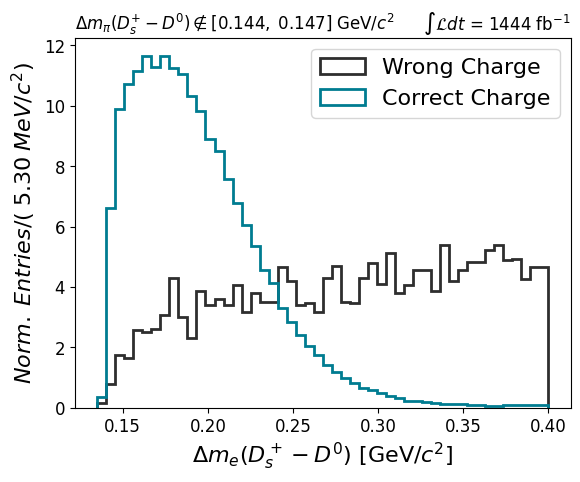

In [28]:
# Settings
Bins = 50
Range = [0.135, 0.4]
per_bin = ((Range[1] - Range[0]) / Bins) * 1000
Density = True  # shape comparison
label = r'$\Delta m_{e}(D_s^+ - D^0)$ [GeV/$c^2$]'

# Data
df_correct = DataFrames["Signal"]
df_wrong = DataFrames["Signal_WCh"]

# Extract plot variable
x_correct = df_correct['Ds_diff_D0pi'].dropna()
x_wrong = df_wrong['Ds_diff_D0pi'].dropna()

# === Real Signal Fractions ===
count_correct_total = len(df_correct)
count_correct_real = (df_correct["Ds_isSignal"] == 1).sum()
percent_correct = 100.0 * count_correct_real / count_correct_total if count_correct_total > 0 else 0.0

count_wrong_total = len(df_wrong)
count_wrong_real = (df_wrong["Ds_isSignal"] == 1).sum()
percent_wrong = 100.0 * count_wrong_real / count_wrong_total if count_wrong_total > 0 else 0.0

print("Real Signal Fraction:")
print(f"  Correct Charge (Signal):         {percent_correct:.2f}% ({count_correct_real}/{count_correct_total})")
print(f"  Wrong Charge (Signal_WCh):       {percent_wrong:.2f}% ({count_wrong_real}/{count_wrong_total})")

# === Plot ===
plt.hist([x_correct, x_wrong],
         bins=Bins,
         range=Range,
         density=Density,
         histtype='step',
         linewidth=2,
         label=["Correct Charge", "Wrong Charge"],
         color=["#007C91", "#2E2E2E"])

# Labels and titles
plt.xlabel(label)
plt.ylabel(r'$Norm. \; Entries/(\;{:.2f}\; MeV/c^2)$'.format(per_bin))
plt.title(r'$\Delta m_{\pi}(D_s^{+} - D^{0}) \notin [0.144,\; 0.147] \; \mathrm{GeV}/c^{2}$', loc="left")
plt.title(r"$\int\mathcal{L}dt$ = 1444 fb$^{-1}$", loc="right")
plt.legend()
plt.show()

Real Signal Fraction:
  Correct Charge (Signal):         96.38% (81143/84187)
  Wrong Charge (Signal_WCh):       0.00% (0/4604)


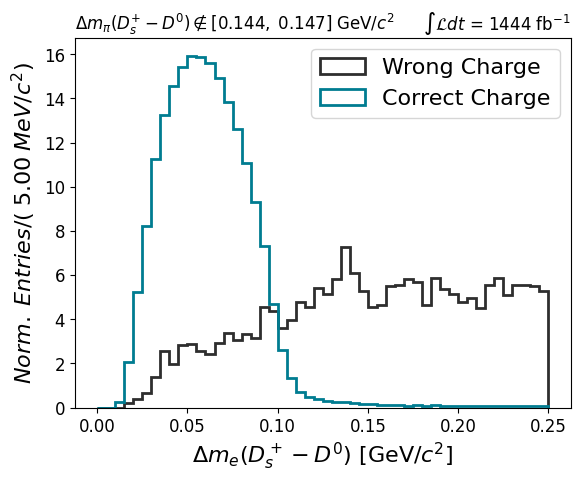

In [15]:
# Settings
Bins = 50
Range = [0.0, 0.25]
per_bin = ((Range[1] - Range[0]) / Bins) * 1000
Density = True  # shape comparison
label = r'$\Delta m_{e}(D_s^+ - D^0)$ [GeV/$c^2$]'

# Data
df_correct = DataFrames["Signal"]
df_wrong = DataFrames["Signal_WCh"]

# Extract plot variable
x_correct = df_correct["Ds_massDifference_0"].dropna()
x_wrong = df_wrong["Ds_massDifference_0"].dropna()

# === Real Signal Fractions ===
count_correct_total = len(df_correct)
count_correct_real = (df_correct["Ds_isSignal"] == 1).sum()
percent_correct = 100.0 * count_correct_real / count_correct_total if count_correct_total > 0 else 0.0

count_wrong_total = len(df_wrong)
count_wrong_real = (df_wrong["Ds_isSignal"] == 1).sum()
percent_wrong = 100.0 * count_wrong_real / count_wrong_total if count_wrong_total > 0 else 0.0

print("Real Signal Fraction:")
print(f"  Correct Charge (Signal):         {percent_correct:.2f}% ({count_correct_real}/{count_correct_total})")
print(f"  Wrong Charge (Signal_WCh):       {percent_wrong:.2f}% ({count_wrong_real}/{count_wrong_total})")

# === Plot ===
plt.hist([x_correct, x_wrong],
         bins=Bins,
         range=Range,
         density=Density,
         histtype='step',
         linewidth=2,
         label=["Correct Charge", "Wrong Charge"],
         color=["#007C91", "#2E2E2E"])

# Labels and titles
plt.xlabel(label)
plt.ylabel(r'$Norm. \; Entries/(\;{:.2f}\; MeV/c^2)$'.format(per_bin))
plt.title(r'$\Delta m_{\pi}(D_s^{+} - D^{0}) \notin [0.144,\; 0.147] \; \mathrm{GeV}/c^{2}$', loc="left")
plt.title(r"$\int\mathcal{L}dt$ = 1444 fb$^{-1}$", loc="right")
plt.legend()
plt.show()

Width Per Bin (mass diff): 5.00 MeV
Width Per Bin (D0pi diff): 5.00 MeV


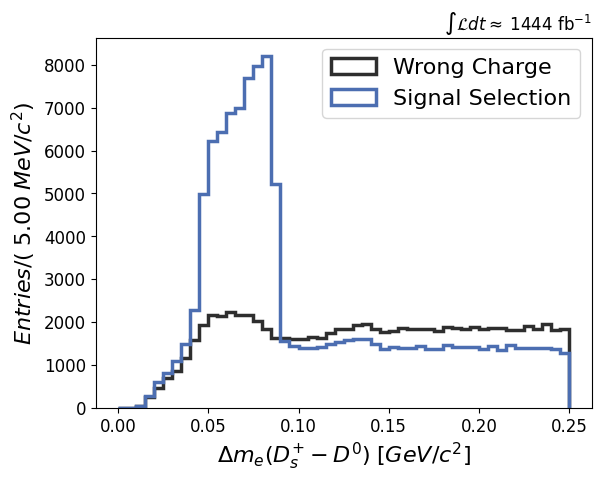

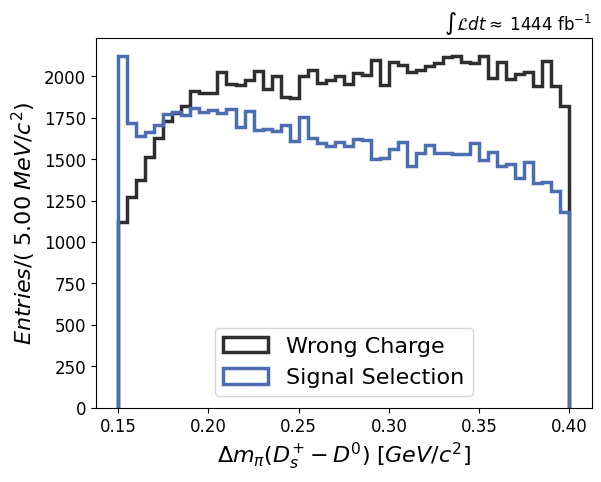

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
Bins = 50
Range_mass = [0.0, 0.25]
Range_dpi = [0.15, 0.4]
perBin_mass = ((Range_mass[1] - Range_mass[0]) / Bins) * 1000
perBin_dpi = ((Range_dpi[1] - Range_dpi[0]) / Bins) * 1000

print("Width Per Bin (mass diff): {:.2f} MeV".format(perBin_mass))
print("Width Per Bin (D0pi diff): {:.2f} MeV".format(perBin_dpi))

# === Variables ===
mass_var = 'Ds_massDifference_0'
dpi_var = 'Ds_diff_D0pi'
BS = -1

# === Control sample: Wrong-Charge (no category split) ===
df_ctrl = DataFrames["All_WCh"]
ctrl_mask = (df_ctrl["Ds_BkgBDT"] >= BS)
ctrl_mass = df_ctrl.loc[ctrl_mask, mass_var].to_numpy()
ctrl_dpi = df_ctrl.loc[ctrl_mask, dpi_var].to_numpy()

# === Generic MC sample: Signal Selection (no category split) ===
df_gen = DataFrames["All"]
gen_mask = (df_gen["Ds_BkgBDT"] >= BS)
gen_mass = df_gen.loc[gen_mask, mass_var].to_numpy()
gen_dpi = df_gen.loc[gen_mask, dpi_var].to_numpy()

# === Plot 1: Ds_massDifference_0 ===
plt.hist([gen_mass, ctrl_mass],
         label=["Signal Selection", "Wrong Charge"],
         color=["#4C6EB1", "#2E2E2E"],
         bins=Bins,
         range=Range_mass,
         histtype='step',
         linewidth=2.5)

# plt.title(r"$D^{*+}$ Peak Comparison:", loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{e}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
plt.ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_mass))
plt.legend()
plt.show()

# === Plot 2: Ds_diff_D0pi ===
plt.hist([gen_dpi, ctrl_dpi],
         label=["Signal Selection", "Wrong Charge"],
         color=["#4C6EB1", "#2E2E2E"],
         bins=Bins,
         range=Range_dpi,
         histtype='step',
         linewidth=2.5)

# plt.title(r"$D^{*+}$ Peak Comparison:", loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{\pi}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
plt.ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_dpi))
plt.legend()
plt.show()


Width Per Bin (mass diff): 5.00 MeV
Width Per Bin (D0pi diff): 5.00 MeV


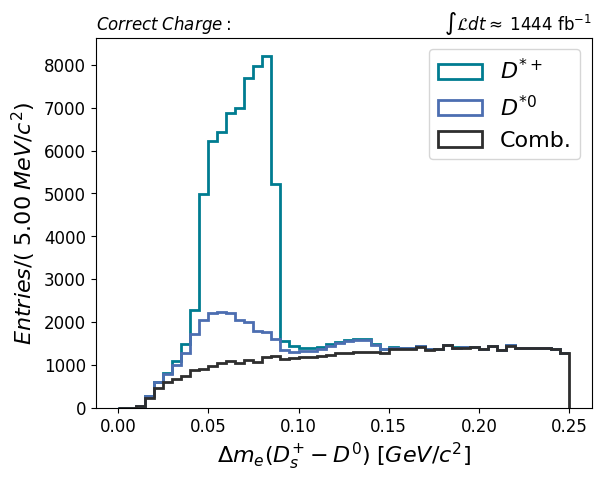

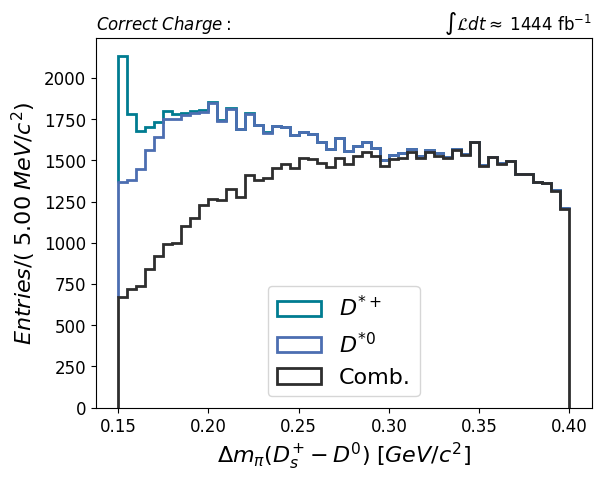

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
Stacked = True
Density = False
Bins = 50
Range_mass = [0.0, 0.25]
Range_dpi = [0.15, 0.4]  # adjust if needed
perBin_mass = ((Range_mass[1] - Range_mass[0]) / Bins) * 1000  # in MeV
perBin_dpi = ((Range_dpi[1] - Range_dpi[0]) / Bins) * 1000

print("Width Per Bin (mass diff): {:.2f} MeV".format(perBin_mass))
print("Width Per Bin (D0pi diff): {:.2f} MeV".format(perBin_dpi))

# === Toggle gamma veto cut ===
apply_gammaveto_cut = True
gammaveto_cut = 0.1

# === Data source and variables ===
df_cut = DataFrames["All"]
pdg_var = 'Ds_mcPDG'
mass_var = 'Ds_massDifference_0'
dpi_var = 'Ds_diff_D0pi_noVF'

# === Apply gamma veto cut if requested ===
if apply_gammaveto_cut:
    df_cut = df_cut[df_cut["Ds_gammaveto_M_Correction"] > gammaveto_cut]

# === Categories based on true Ds_mcPDG ===
dstar_plus_mass = df_cut[abs(df_cut[pdg_var]) == 413][mass_var]
dstar_zero_mass = df_cut[abs(df_cut[pdg_var]) == 423][mass_var]
other_mass = df_cut[(abs(df_cut[pdg_var]) != 413) & (abs(df_cut[pdg_var]) != 423)][mass_var]

dstar_plus_dpi = df_cut[abs(df_cut[pdg_var]) == 413][dpi_var]
dstar_zero_dpi = df_cut[abs(df_cut[pdg_var]) == 423][dpi_var]
other_dpi = df_cut[(abs(df_cut[pdg_var]) != 413) & (abs(df_cut[pdg_var]) != 423)][dpi_var]

# === Plot 1: Ds_massDifference_0 ===
plt.hist([other_mass, dstar_zero_mass, dstar_plus_mass],
         color=["#2E2E2E", "#4C6EB1", "#007C91"],
         label=["Comb.", r"$D^{*0}$", r"$D^{*+}$"],
         density=Density,
         stacked=Stacked,
         bins=Bins,
         range=Range_mass,
         histtype='step',
         linewidth=2)

plt.title(r'$Correct \; Charge:$', loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{e}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
plt.ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_mass))
plt.legend()
plt.show()

# === Plot 2: Ds_diff_D0pi ===
plt.hist([other_dpi, dstar_zero_dpi, dstar_plus_dpi],
         color=["#2E2E2E", "#4C6EB1", "#007C91"],
         label=["Comb.", r"$D^{*0}$", r"$D^{*+}$"],
         density=Density,
         stacked=Stacked,
         bins=Bins,
         range=Range_dpi,
         histtype='step',
         linewidth=2)

plt.title(r'$Correct \; Charge:$', loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{\pi}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
plt.ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_dpi))
plt.legend()
plt.show()

Width Per Bin (mass diff): 5.00 MeV
Width Per Bin (D0pi diff): 5.00 MeV


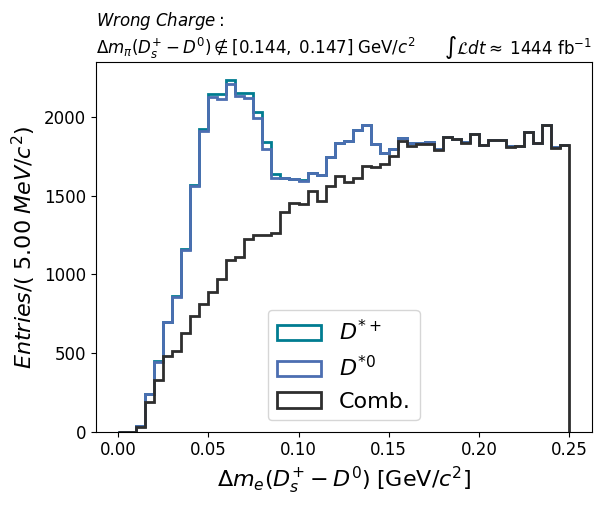

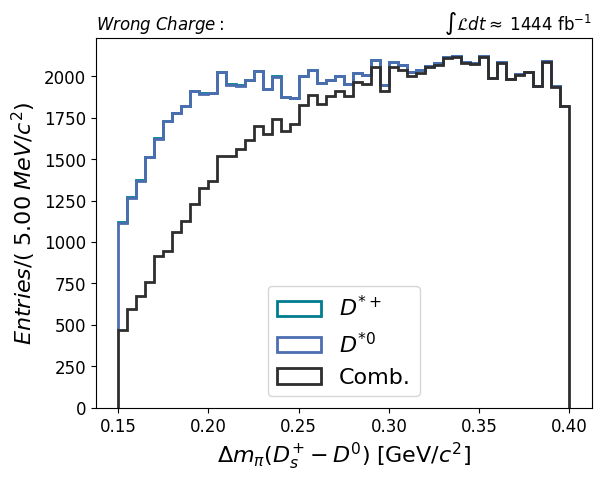

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
Stacked = True
Density = False
Bins = 50
Range_mass = [0.0, 0.25]
Range_dpi = [0.15, 0.4]  # Adjust as needed
perBin_mass = ((Range_mass[1] - Range_mass[0]) / Bins) * 1000  # MeV
perBin_dpi = ((Range_dpi[1] - Range_dpi[0]) / Bins) * 1000      # MeV

print("Width Per Bin (mass diff): {:.2f} MeV".format(perBin_mass))
print("Width Per Bin (D0pi diff): {:.2f} MeV".format(perBin_dpi))

# === Toggle gamma veto cut ===
apply_gammaveto_cut = True
gammaveto_cut = 0.1

# === Data source and variables ===
df_cut = DataFrames["All_WCh"]
pdg_var = 'Ds_mcPDG'
mass_var = 'Ds_massDifference_0'
dpi_var = 'Ds_diff_D0pi'

# === Apply gamma veto cut if requested ===
if apply_gammaveto_cut:
    df_cut = df_cut[df_cut["Ds_gammaveto_M_Correction"] > gammaveto_cut]

# === Split categories for both variables ===
dstar_plus_mass = df_cut[abs(df_cut[pdg_var]) == 413][mass_var]
dstar_zero_mass = df_cut[abs(df_cut[pdg_var]) == 423][mass_var]
other_mass = df_cut[(abs(df_cut[pdg_var]) != 413) & (abs(df_cut[pdg_var]) != 423)][mass_var]

dstar_plus_dpi = df_cut[abs(df_cut[pdg_var]) == 413][dpi_var]
dstar_zero_dpi = df_cut[abs(df_cut[pdg_var]) == 423][dpi_var]
other_dpi = df_cut[(abs(df_cut[pdg_var]) != 413) & (abs(df_cut[pdg_var]) != 423)][dpi_var]

# === Plot 1: Ds_massDifference_0 ===
plt.hist([other_mass, dstar_zero_mass, dstar_plus_mass],
         color=["#2E2E2E", "#4C6EB1", "#007C91"],
         label=["Comb.", r"$D^{*0}$", r"$D^{*+}$"],
         density=Density,
         stacked=Stacked,
         bins=Bins,
         range=Range_mass,
         histtype='step',
         linewidth=2)

plt.title(r'$Wrong \; Charge:$' + '\n' +
          r'$\Delta m_{\pi}(D_s^{+} - D^{0}) \notin [0.144,\; 0.147] \; \mathrm{GeV}/c^{2}$', loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{e}(D_s^{+} - D^{0})\;[\mathrm{GeV}/c^{2}]$')
plt.ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_mass))
plt.legend()
plt.show()

# === Plot 2: Ds_diff_D0pi ===
plt.hist([other_dpi, dstar_zero_dpi, dstar_plus_dpi],
         color=["#2E2E2E", "#4C6EB1", "#007C91"],
         label=["Comb.", r"$D^{*0}$", r"$D^{*+}$"],
         density=Density,
         stacked=Stacked,
         bins=Bins,
         range=Range_dpi,
         histtype='step',
         linewidth=2)

plt.title(r'$Wrong \; Charge:$', loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{\pi}(D_s^{+} - D^{0})\;[\mathrm{GeV}/c^{2}]$')
plt.ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_dpi))
plt.legend()
plt.show()

Width Per Bin (mass diff): 5.00 MeV
Width Per Bin (D0pi diff): 5.00 MeV


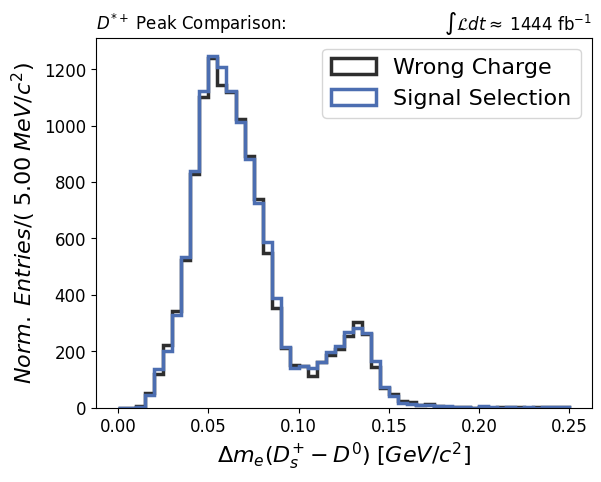

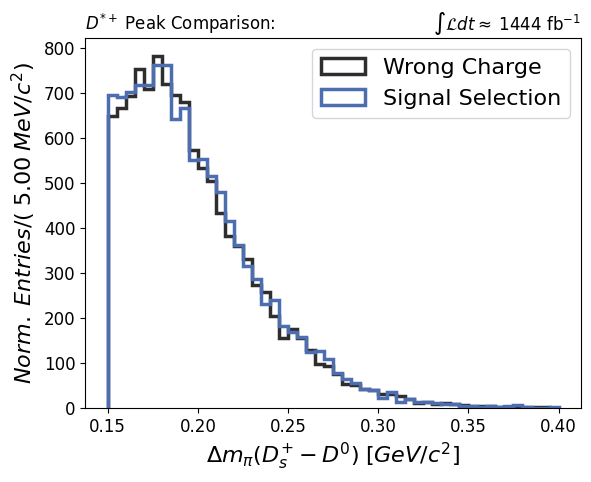

In [19]:
import matplotlib.pyplot as plt

# === Settings ===
Stacked = False
Density = False
Bins = 50
Range_mass = [0.0, 0.25]
Range_dpi = [0.15, 0.4]  # Adjust if needed
perBin_mass = ((Range_mass[1] - Range_mass[0]) / Bins) * 1000
perBin_dpi = ((Range_dpi[1] - Range_dpi[0]) / Bins) * 1000

print("Width Per Bin (mass diff): {:.2f} MeV".format(perBin_mass))
print("Width Per Bin (D0pi diff): {:.2f} MeV".format(perBin_dpi))

# === Variables ===
pdg_var = 'Ds_mcPDG'
mass_var = 'Ds_massDifference_0'
dpi_var = 'Ds_diff_D0pi'
BS = -1

# === Control sample: Wrong-Charge ===
df_ctrl = DataFrames["All_WCh"]
ctrl_mask = (
    (df_ctrl["Ds_BkgBDT"] >= BS) &
    (abs(df_ctrl[pdg_var]) == 423)
)
ctrl_mass = df_ctrl.loc[ctrl_mask, mass_var].to_numpy()
ctrl_dpi = df_ctrl.loc[ctrl_mask, dpi_var].to_numpy()

# === Generic MC sample ===
df_gen = DataFrames["All"]
gen_mask = (
    (df_gen["Ds_BkgBDT"] >= BS) &
    (abs(df_gen[pdg_var]) == 423)
)
gen_mass = df_gen.loc[gen_mask, mass_var].to_numpy()
gen_dpi = df_gen.loc[gen_mask, dpi_var].to_numpy()

# === Plot 1: Ds_massDifference_0 ===
plt.hist([gen_mass, ctrl_mass],
         label=["Signal Selection", "Wrong Charge"],
         color=["#4C6EB1", "#2E2E2E"],
         density=Density,
         stacked=Stacked,
         bins=Bins,
         range=Range_mass,
         histtype='step',
         linewidth=2.5)

plt.title(r"$D^{*+}$ Peak Comparison:", loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{e}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
plt.ylabel(r'$Norm. \; Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_mass))
plt.legend()
plt.show()

# === Plot 2: Ds_diff_D0pi ===
plt.hist([gen_dpi, ctrl_dpi],
         label=["Signal Selection", "Wrong Charge"],
         color=["#4C6EB1", "#2E2E2E"],
         density=Density,
         stacked=Stacked,
         bins=Bins,
         range=Range_dpi,
         histtype='step',
         linewidth=2.5)

plt.title(r"$D^{*+}$ Peak Comparison:", loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{\pi}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
plt.ylabel(r'$Norm. \; Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_dpi))
plt.legend()
plt.show()

Width Per Bin (mass diff): 5.00 MeV
Width Per Bin (D0pi diff): 5.00 MeV


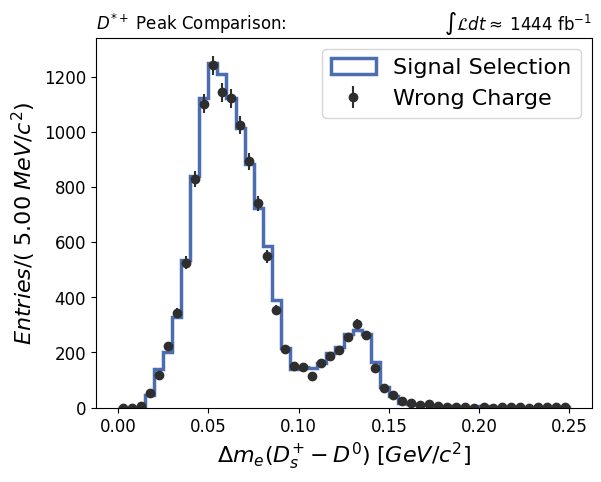

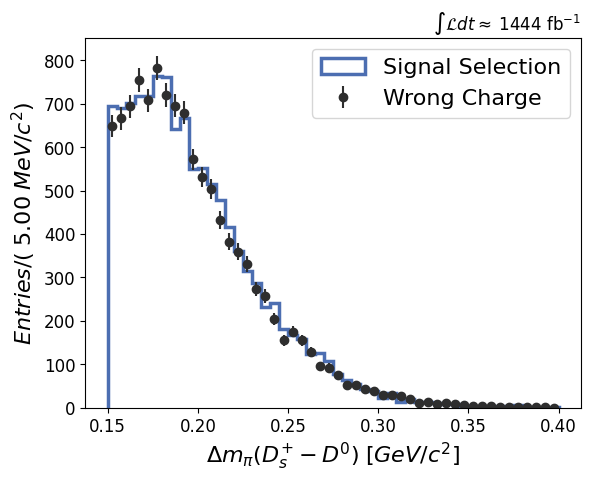

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
Stacked = False
Density = False
Bins = 50
Range_mass = [0.0, 0.25]
Range_dpi = [0.15, 0.4]
perBin_mass = ((Range_mass[1] - Range_mass[0]) / Bins) * 1000
perBin_dpi = ((Range_dpi[1] - Range_dpi[0]) / Bins) * 1000

print("Width Per Bin (mass diff): {:.2f} MeV".format(perBin_mass))
print("Width Per Bin (D0pi diff): {:.2f} MeV".format(perBin_dpi))

# === Variables ===
pdg_var = 'Ds_mcPDG'
mass_var = 'Ds_massDifference_0'
dpi_var = 'Ds_diff_D0pi'
BS = -1

# === Control sample: Wrong-Charge ===
df_ctrl = DataFrames["All_WCh"]
ctrl_mask = (
    (df_ctrl["Ds_BkgBDT"] >= BS) &
    (abs(df_ctrl[pdg_var]) == 423)
)
ctrl_mass = df_ctrl.loc[ctrl_mask, mass_var].to_numpy()
ctrl_dpi = df_ctrl.loc[ctrl_mask, dpi_var].to_numpy()

# === Generic MC sample ===
df_gen = DataFrames["All"]
gen_mask = (
    (df_gen["Ds_BkgBDT"] >= BS) &
    (abs(df_gen[pdg_var]) == 423)
)
gen_mass = df_gen.loc[gen_mask, mass_var].to_numpy()
gen_dpi = df_gen.loc[gen_mask, dpi_var].to_numpy()

# === Plot 1: Ds_massDifference_0 ===
counts_gen, edges = np.histogram(gen_mass, bins=Bins, range=Range_mass)
counts_ctrl, _ = np.histogram(ctrl_mass, bins=edges)

bin_centers = 0.5 * (edges[:-1] + edges[1:])
errors_ctrl = np.sqrt(counts_ctrl)

plt.hist(bin_centers, bins=edges, weights=counts_gen,
         label="Signal Selection",
         color="#4C6EB1",
         histtype='step',
         linewidth=2.5)

plt.errorbar(bin_centers, counts_ctrl,
             yerr=errors_ctrl,
             fmt='o',
             color="#2E2E2E",
             label="Wrong Charge")

plt.title(r"$D^{*+}$ Peak Comparison:", loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{e}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
plt.ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_mass))
plt.legend()
plt.show()

# === Plot 2: Ds_diff_D0pi ===
counts_gen, edges = np.histogram(gen_dpi, bins=Bins, range=Range_dpi)
counts_ctrl, _ = np.histogram(ctrl_dpi, bins=edges)

bin_centers = 0.5 * (edges[:-1] + edges[1:])
errors_ctrl = np.sqrt(counts_ctrl)

plt.hist(bin_centers, bins=edges, weights=counts_gen,
         label="Signal Selection",
         color="#4C6EB1",
         histtype='step',
         linewidth=2.5)

plt.errorbar(bin_centers, counts_ctrl,
             yerr=errors_ctrl,
             fmt='o',
             color="#2E2E2E",
             label="Wrong Charge")

# plt.title(r"$D^{*+}$ Peak Comparison:", loc="left")
plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
plt.xlabel(r'$\Delta m_{\pi}(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
plt.ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin_dpi))
plt.legend()
plt.show()

Background Subtraction

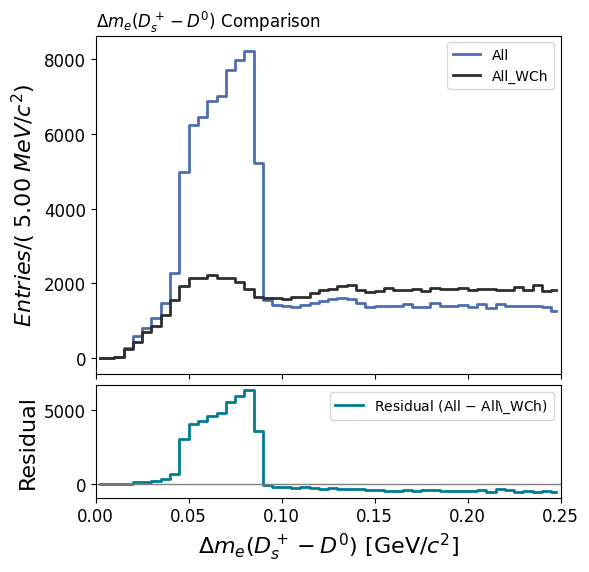

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
Bins = 50
Range = [0.0, 0.25]
color_all = "#4C6EB1"     # For "All"
color_wch = "#2E2E2E"     # For "All_WCh"
residual_color = "#007C91"
per_bin = ((Range[1] - Range[0]) / Bins) * 1000  # MeV
plot_var_e = "Ds_massDifference_0"
figsize = (6, 6)

# === Histogram binning ===
edges = np.linspace(Range[0], Range[1], Bins + 1)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# === Extract and clean data ===
df_all = DataFrames["All"]
df_wch = DataFrames["All_WCh"]

vals_all = df_all[plot_var_e].replace([np.inf, -np.inf], np.nan).dropna()
vals_wch = df_wch[plot_var_e].replace([np.inf, -np.inf], np.nan).dropna()

hist_all, _ = np.histogram(vals_all, bins=edges)
hist_wch, _ = np.histogram(vals_wch, bins=edges)
residual = hist_all - hist_wch

# === Plotting ===
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=figsize,
                               gridspec_kw={"height_ratios": [3, 1]})

# --- Top: Overlayed distributions ---
ax1.step(bin_centers, hist_all, where='mid', color=color_all, label="All", linewidth=2)
ax1.step(bin_centers, hist_wch, where='mid', color=color_wch, label="All_WCh", linewidth=2)

ax1.set_ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(per_bin))
ax1.set_xlim(Range)
ax1.set_title(r"$\Delta m_{e}(D_s^+ - D^0)$ Comparison", loc="left")
ax1.legend(fontsize=10)

# --- Bottom: Residual ---
ax2.step(bin_centers, residual, where='mid', color=residual_color,
         label=r"Residual (All $-$ All\_WCh)", linewidth=2)

ax2.set_xlabel(r"$\Delta m_{e}(D_s^+ - D^0)$ [GeV/$c^2$]")
ax2.set_ylabel("Residual")
ax2.set_xlim(Range)
ax2.axhline(0, color='gray', lw=1)
ax2.legend(fontsize=10)

plt.subplots_adjust(hspace=0.05)
plt.show()

# data/MC Comparison

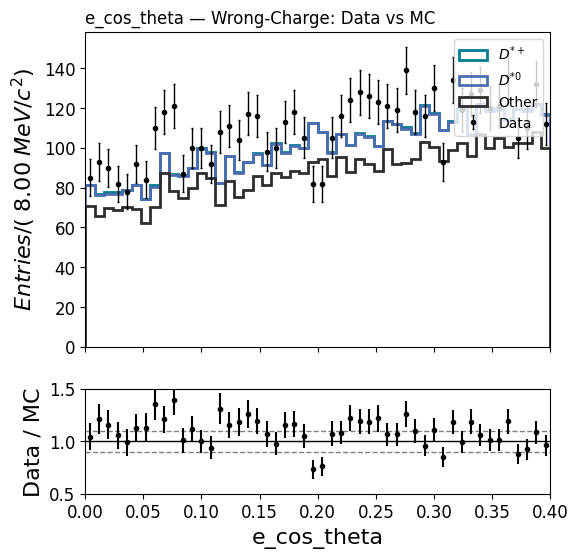

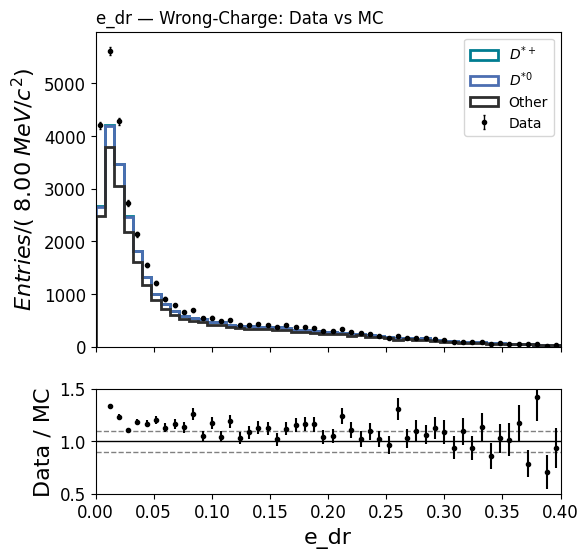

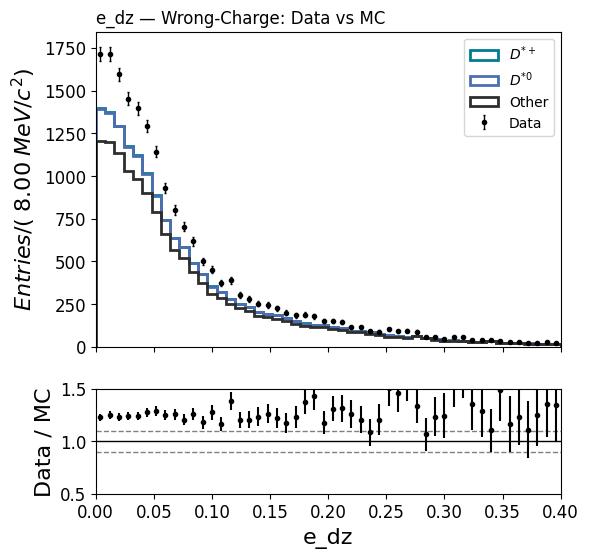

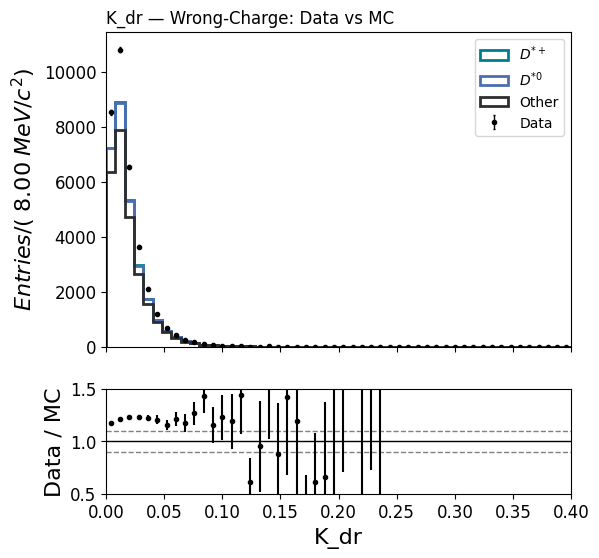

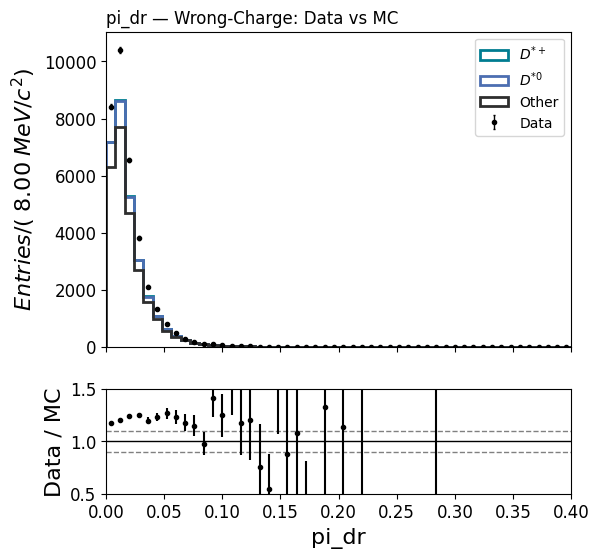

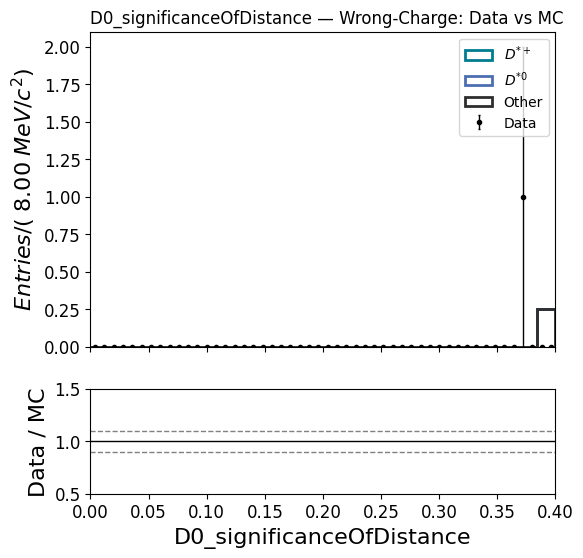

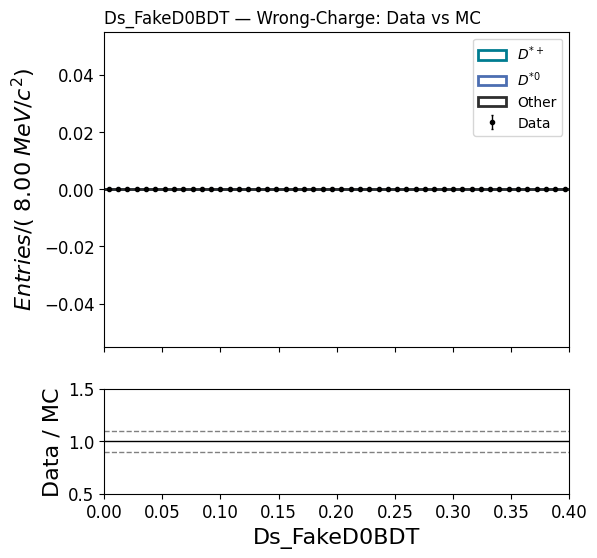

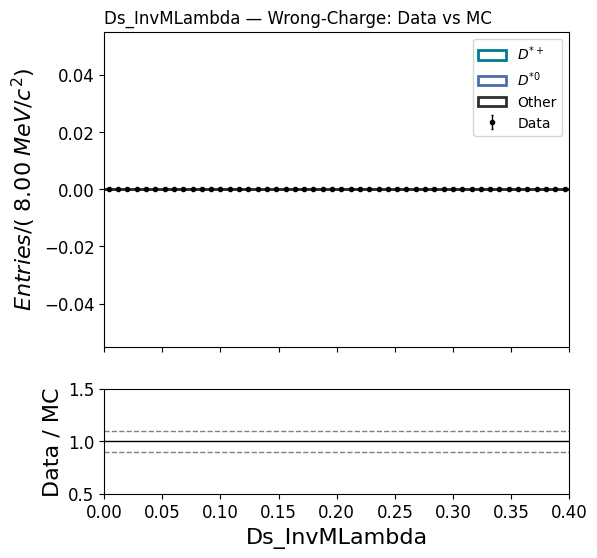

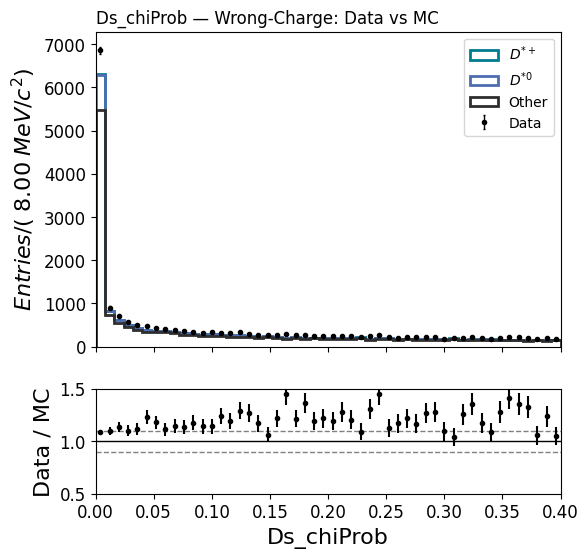

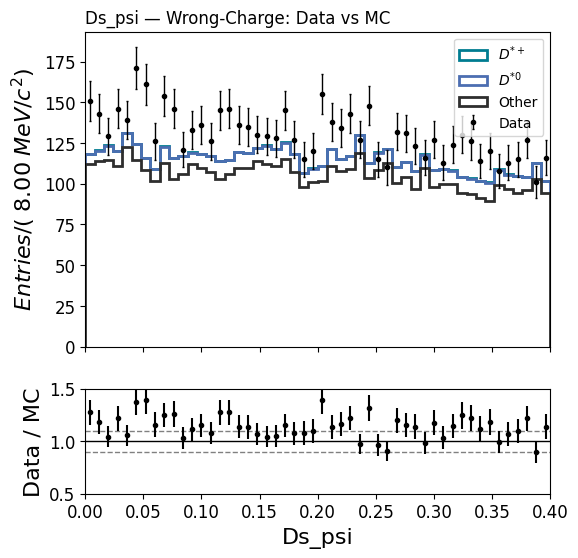

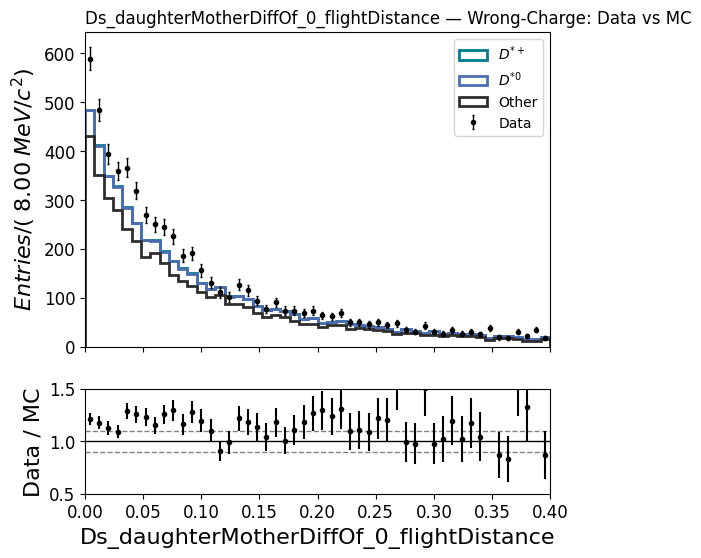

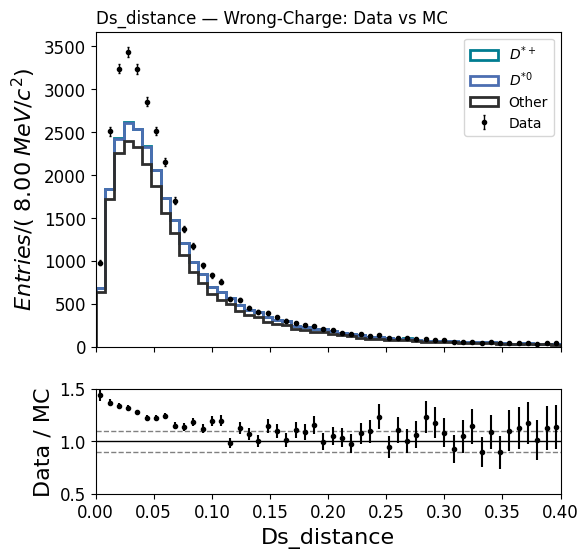

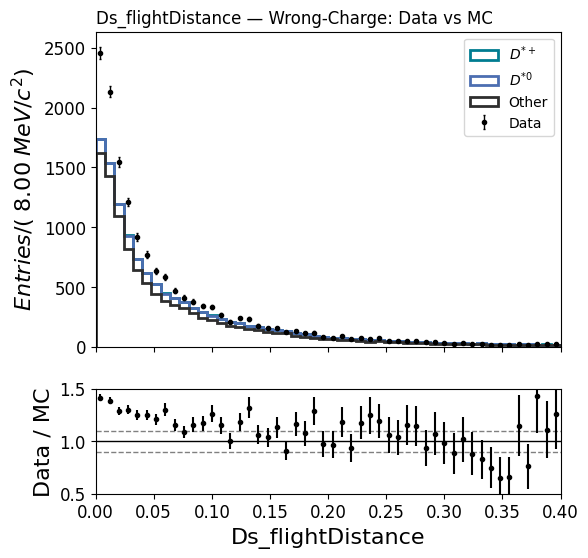

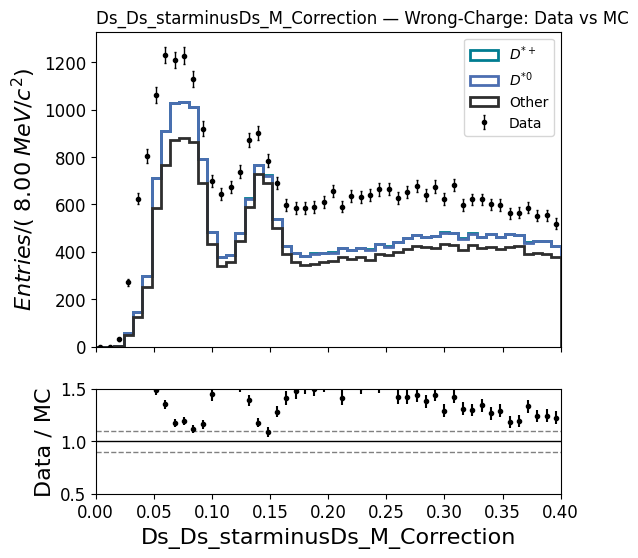

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Settings ===
Bins = 50
Range = None
Density = False
lum_data = 364.093   # fb⁻¹
lum_MC = 1443.999    # fb⁻¹
scale_factor = lum_data / lum_MC
figsize = (6, 6)

# === Colors and category order
mc_colors_ordered = ["#2E2E2E", "#4C6EB1", "#007C91"]  # Other, D*0, D*+

# === Load DataFrames (these must be preloaded)
df_mc_base = DataFrames["All_WCh"][DataFrames["All_WCh"]['Ds_FakeD0BDT'] >= 0.7]
df_data_base = DataFrames["Data_WCh"][DataFrames["Data_WCh"]['Ds_FakeD0BDT'] >= 0.7]

# === Split MC by truth category — order matters
pdg_var = "Ds_mcPDG"
df_mc_other = df_mc_base[(abs(df_mc_base[pdg_var]) != 413) & (abs(df_mc_base[pdg_var]) != 423)]
df_mc_dstar0 = df_mc_base[abs(df_mc_base[pdg_var]) == 423]
df_mc_dstarp = df_mc_base[abs(df_mc_base[pdg_var]) == 413]
mc_categories = [
    ("Other", df_mc_other),
    (r"$D^{*0}$", df_mc_dstar0),
    (r"$D^{*+}$", df_mc_dstarp),
]

# === Optional range overrides
xrange_override = {
    "e_p": (0, 0.8),
    "pi_p": (0, 1.0),
    "K_p": (0.1, 1.0),
}

# === Variables grouped and ordered
features = [
    # Electron
    "e_cos_theta", "e_dr", "e_dz",
    # Kaon
    "K_dr",
    # Pion
    "pi_dr",
    # D0
    "D0_significanceOfDistance","Ds_FakeD0BDT",
    # Ds
    "Ds_InvMLambda", "Ds_chiProb",
    "Ds_psi","Ds_daughterMotherDiffOf_0_flightDistance", "Ds_distance", "Ds_flightDistance","Ds_Ds_starminusDs_M_Correction"
]

for col in features:
    if col not in df_mc_base.columns or col not in df_data_base.columns:
        print(f"Skipping missing variable: {col}")
        continue

    vals_data = df_data_base[col].replace([np.inf, -np.inf], np.nan).dropna()
    if len(vals_data) == 0:
        continue

    mc_vals_list = []
    for _, df_cat in mc_categories:
        vals = df_cat[col].replace([np.inf, -np.inf], np.nan).dropna()
        mc_vals_list.append(vals)

    # if col in xrange_override:
    #     low, high = xrange_override[col]
    # else:
    #     all_vals = [v for v in mc_vals_list if len(v) > 0]
    #     if len(all_vals) == 0:
    #         continue
    #     low = min(np.percentile(vals_data, 1), *(np.percentile(v, 1) for v in all_vals))
    #     high = max(np.percentile(vals_data, 99), *(np.percentile(v, 99) for v in all_vals))
    # if low == high:
    #     continue

    low = 0
    high = 0.4

    edges = np.linspace(low, high, Bins + 1)
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    perBin = (edges[1] - edges[0]) * 1000  # MeV

    # === Histogram contents
    hist_data, _ = np.histogram(vals_data, bins=edges, density=Density)
    err_data = np.sqrt(hist_data)

    mc_weights = [np.full(len(v), scale_factor) for v in mc_vals_list]
    hist_mc_raw = sum(np.histogram(v, bins=edges)[0] for v in mc_vals_list)
    hist_mc = scale_factor * hist_mc_raw
    err_mc = scale_factor * np.sqrt(hist_mc_raw)

    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = hist_data / hist_mc
        ratio[np.isnan(ratio)] = 0
        ratio[np.isinf(ratio)] = 0
        err_ratio = ratio * np.sqrt(
            (err_data / np.maximum(hist_data, 1e-10))**2 +
            (err_mc / np.maximum(hist_mc, 1e-10))**2
        )
        err_ratio[np.isnan(err_ratio)] = 0
        err_ratio[np.isinf(err_ratio)] = 0

    # === Plotting
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=figsize,
                                   gridspec_kw={"height_ratios": [3, 1]})

    ax1.hist(mc_vals_list,
             bins=edges,
             histtype='step',
             stacked=True,
             color=mc_colors_ordered,
             label=[name for name, _ in mc_categories],
             weights=mc_weights,
             linewidth=2)

    ax1.errorbar(bin_centers, hist_data, yerr=err_data, fmt='o',
                 color='black', markersize=3, label="Data",
                 capsize=1, elinewidth=1)

    ax1.set_ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin))
    ax1.set_xlim([low, high])
    ax1.set_title(f"{col} — Wrong-Charge: Data vs MC", loc="left")
    ax1.legend(loc="upper right", fontsize=10)

    ax2.axhline(1.0, color='black', lw=1)
    ax2.axhline(1.1, color='gray', lw=1, ls='dashed')
    ax2.axhline(0.9, color='gray', lw=1, ls='dashed')
    ax2.errorbar(bin_centers, ratio, yerr=err_ratio, fmt='o',
                 color='black', markersize=3)
    ax2.set_ylabel("Data / MC")
    ax2.set_xlabel(col)
    ax2.set_xlim([low, high])
    ax2.set_ylim(0.5, 1.5)

    plt.show()

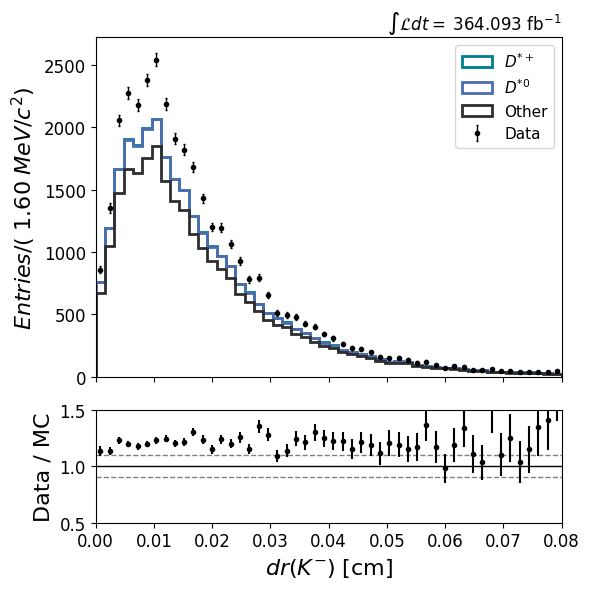

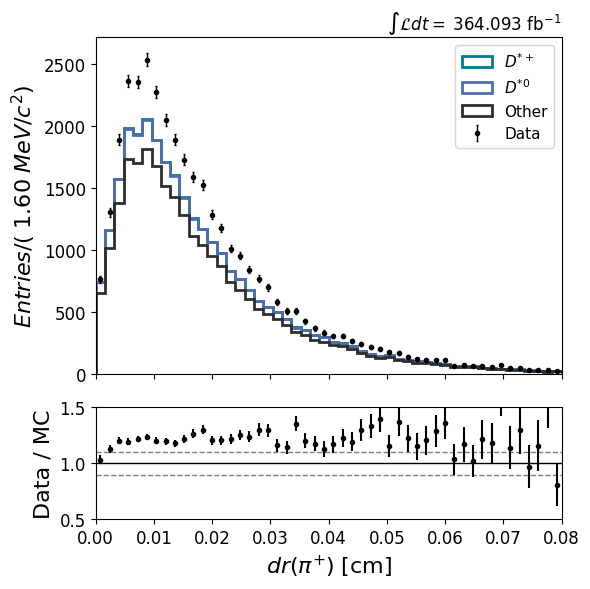

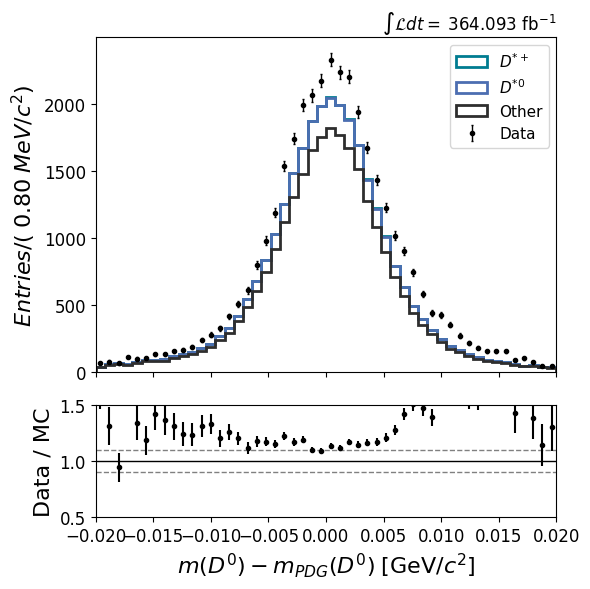

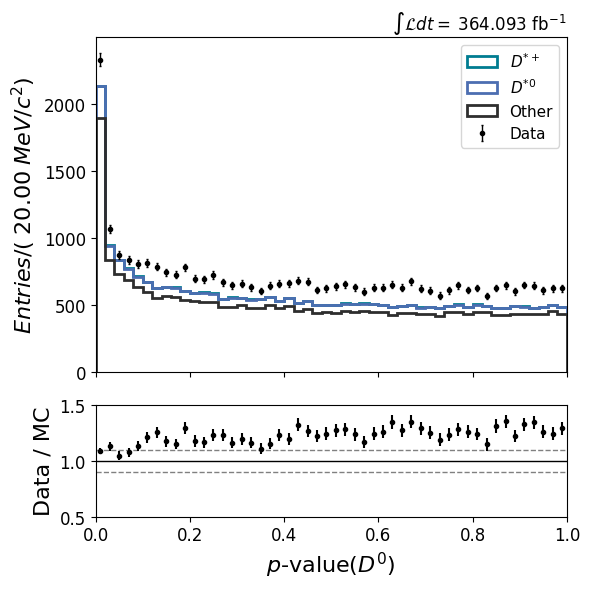

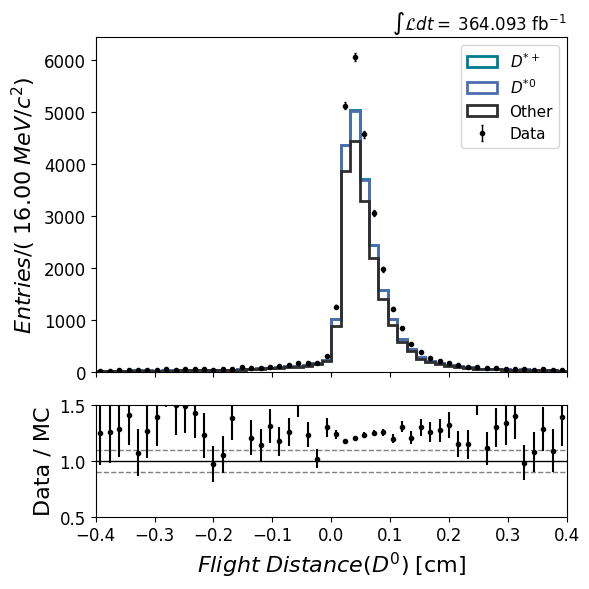

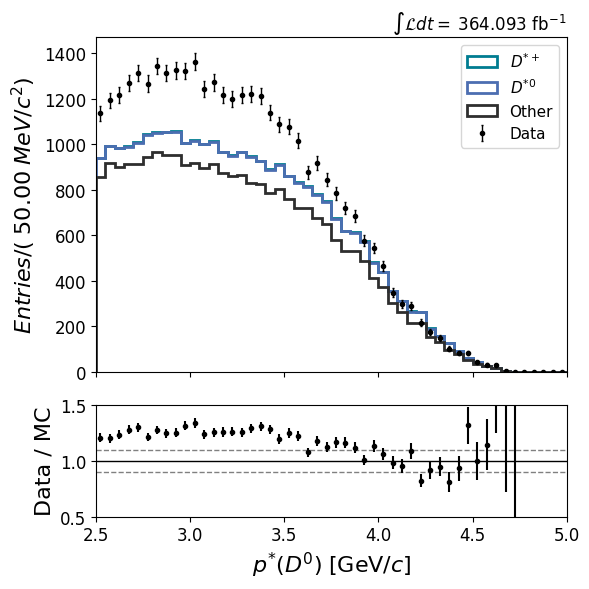

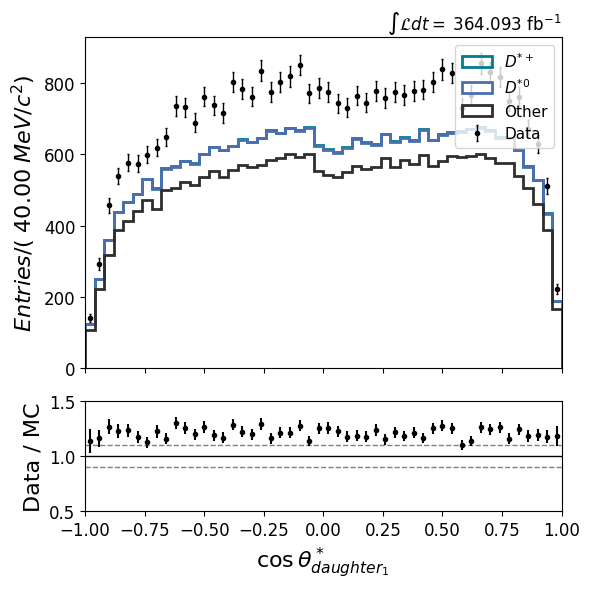

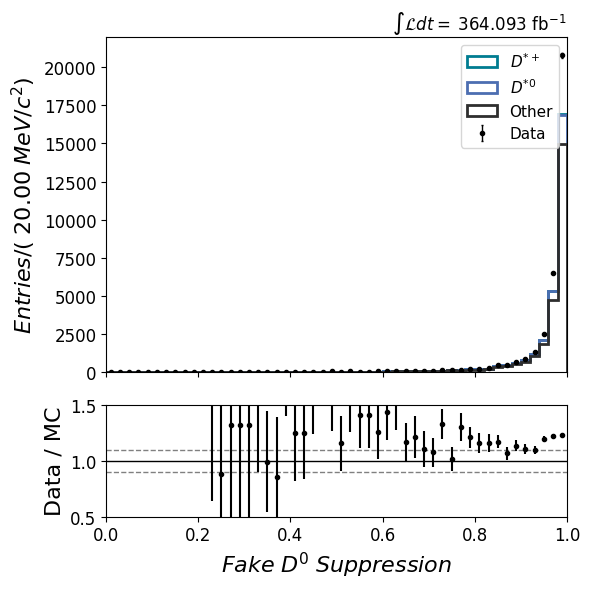

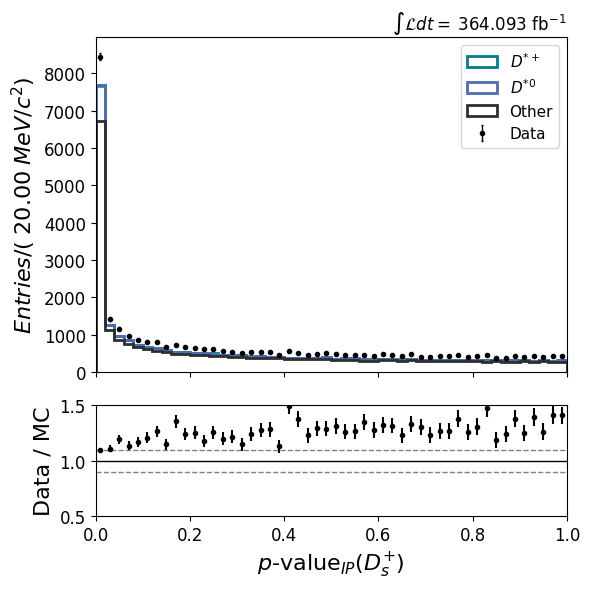

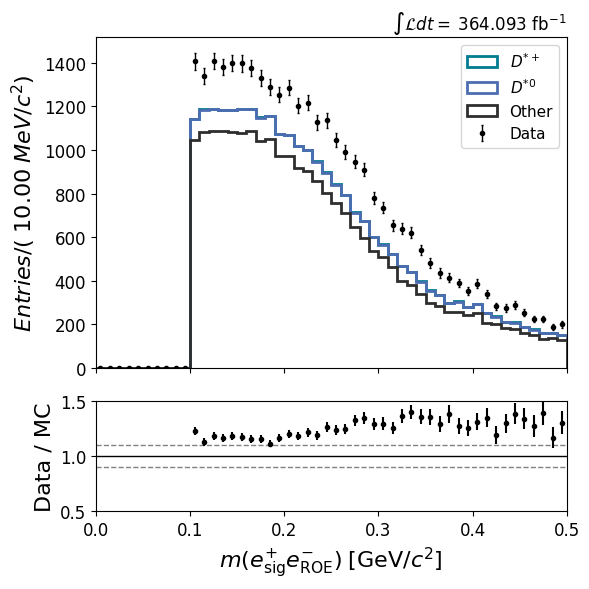

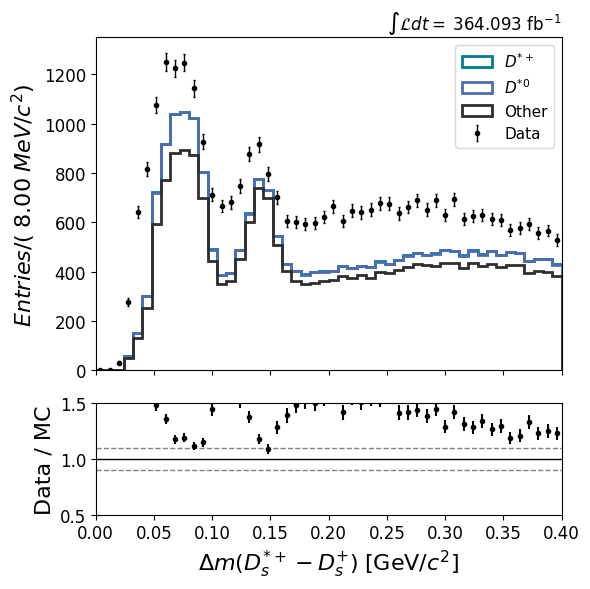

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
Bins = 50
Density = False
lum_data = 364.093
lum_MC = 1443.999
scale_factor = lum_data / lum_MC
figsize = (6, 6)

# === Output Directory ===
output_dir = "/home/belle2/amubarak/YourSaveDir/DataMC_WCh"
os.makedirs(output_dir, exist_ok=True)

# === Variables, Labels, Ranges ===
Variables = [
    'K_dr', 'pi_dr', 'D0_dM', 'D0_chiProb', 'D0_flightDistance',
    'D0_useCMSFrame_p', 'D0_cos_decayAngle_1',
    "Ds_FakeD0BDT", "Ds_chiProb", "Ds_gammaveto_M_Correction", "Ds_Ds_starminusDs_M_Correction"
]

features = [
    r'$dr(K^{-})\;[\mathrm{cm}]$', r'$dr(\pi^{+})\;[\mathrm{cm}]$',
    r'$m(D^{0}) - m_{PDG}(D^{0})\;[\mathrm{GeV}/c^{2}]$', r'$p$-value$(D^{0})$',
    r'$Flight \; Distance(D^{0})\;[\mathrm{cm}]$', r'$p^{*} (D^{0})\;[\mathrm{GeV}/c]$',
    r'$\cos\theta^*_{daughter_1}$',
    r'$Fake\;D^{0}\;Suppression$', r'$p$-value$_{IP}(D_{s}^{+})$',
    r'$m(e_{\mathrm{sig}}^{+}e_{\mathrm{ROE}}^{-})\;[\mathrm{GeV}/c^2]$',
    r'$\Delta m(D_{s}^{*+} - D_{s}^{+})\;[\mathrm{GeV}/c^2]$'
]

ranges = {
    'K_dr': [0, 0.08], 'pi_dr': [0, 0.08], 'D0_dM': [-0.02, 0.02],
    'D0_chiProb': [0, 1], 'D0_flightDistance': [-0.4, 0.4],
    'D0_useCMSFrame_p': [2.5, 5.0], 'D0_cos_decayAngle_1': [-1, 1],
    "Ds_FakeD0BDT": [0.0, 1.0], "Ds_chiProb": [0.0, 1.0],
    "Ds_gammaveto_M_Correction": [0.0, 0.5], "Ds_Ds_starminusDs_M_Correction": [0.0, 0.4]
}

# === DataFrames ===
df_data = DataFrames["Data_WCh"]
df_mc_all = DataFrames["All_WCh"]
pdg_var = "Ds_mcPDG"

# === Split MC by truth category — order matters
df_mc_other = df_mc_all[(abs(df_mc_all[pdg_var]) != 413) & (abs(df_mc_all[pdg_var]) != 423)]
df_mc_dstar0 = df_mc_all[abs(df_mc_all[pdg_var]) == 423]
df_mc_dstarp = df_mc_all[abs(df_mc_all[pdg_var]) == 413]

mc_categories_ordered = [
    ("Other", df_mc_other),
    (r"$D^{*0}$", df_mc_dstar0),
    (r"$D^{*+}$", df_mc_dstarp),
]
mc_colors_ordered = [
    "#2E2E2E", "#4C6EB1", "#007C91"
]

# === Loop through variables ===
for var, label in zip(Variables, features):
    if var not in ranges:
        continue

    Range = ranges[var]
    perBin = ((Range[1] - Range[0]) / Bins) * 1000  # MeV

    # === Histogram edges and centers
    edges = np.linspace(Range[0], Range[1], Bins + 1)
    bin_centers = 0.5 * (edges[:-1] + edges[1:])

    # === Clean data values
    data_vals = df_data[var].replace([np.inf, -np.inf], np.nan).dropna()
    hist_data, _ = np.histogram(data_vals, bins=edges)
    err_data = np.sqrt(hist_data)

    # === MC category values
    mc_vals_list = []
    for _, df_cat in mc_categories_ordered:
        vals = df_cat[var].replace([np.inf, -np.inf], np.nan).dropna()
        mc_vals_list.append(vals)

    # === Total MC for ratio
    mc_all_vals = np.concatenate(mc_vals_list)
    hist_mc_raw, _ = np.histogram(mc_all_vals, bins=edges)
    hist_mc = scale_factor * hist_mc_raw
    err_mc = scale_factor * np.sqrt(hist_mc_raw)

    # === Ratio
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = hist_data / hist_mc
        ratio[np.isnan(ratio)] = 0
        ratio[np.isinf(ratio)] = 0
        err_ratio = ratio * np.sqrt(
            (err_data / np.maximum(hist_data, 1e-10))**2 +
            (err_mc / np.maximum(hist_mc, 1e-10))**2
        )
        err_ratio[np.isnan(err_ratio)] = 0
        err_ratio[np.isinf(err_ratio)] = 0

    # === Plotting
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=figsize,
                                   gridspec_kw={"height_ratios": [3, 1]})

    # === Top panel: stacked MC + data
    ax1.hist(mc_vals_list,
             bins=edges,
             histtype='step',
             stacked=True,
             color=mc_colors_ordered,
             label=[name for name, _ in mc_categories_ordered],
             weights=[np.full(len(vals), scale_factor) for vals in mc_vals_list],
             linewidth=2)

    ax1.errorbar(bin_centers, hist_data, yerr=err_data, fmt='o', color='black',
                 markersize=3, label="Data", capsize=1, elinewidth=1)

    ax1.set_ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin))
    ax1.set_xlim(Range)
    ax1.set_title(r"$\int\mathcal{L}dt =\;364.093$ fb$^{-1}$", loc="right")
    ax1.legend(loc="upper right", fontsize=11)

    # === Bottom panel: Data / MC
    ax2.axhline(1.0, color='black', lw=1)
    ax2.axhline(1.1, color='gray', lw=1, ls='dashed')
    ax2.axhline(0.9, color='gray', lw=1, ls='dashed')
    ax2.errorbar(bin_centers, ratio, yerr=err_ratio, fmt='o',
                 color='black', markersize=3)
    ax2.set_ylabel("Data / MC")
    ax2.set_xlabel(label)
    ax2.set_xlim(Range)
    ax2.set_ylim(0.5, 1.5)

    plt.tight_layout()
    # save_path = os.path.join(output_dir, f"{var}_DataMC_WCh_Stacked.png")
    # plt.savefig(save_path, dpi=300)
    plt.show()
    plt.close()

Width Per Bin: 5.00 MeV


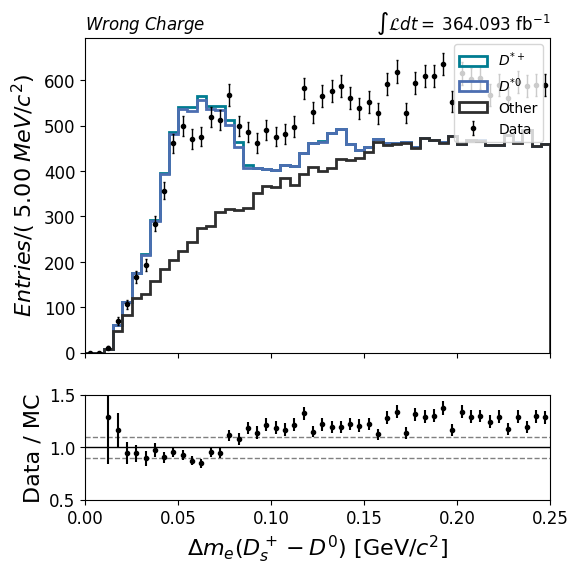

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
Stacked = True
Density = False
Bins = 50
Range = [0.0, 0.25]
perBin = ((Range[1] - Range[0]) / Bins) * 1000  # MeV
print("Width Per Bin: {:.2f} MeV".format(perBin))

plot_var = 'Ds_massDifference_0'
bdt_var = 'Ds_BkgBDT'
lum_data = 364.093   # fb⁻¹
lum_MC = 1443.999    # fb⁻¹
scale_factor = lum_data / lum_MC
figsize = (6, 6)

# === DataFrames ===
df_data = DataFrames["Data_WCh"]
df_mc_all = DataFrames["All_WCh"]
pdg_var = "Ds_mcPDG"

# === MC categories in desired stacking order
df_mc_other = df_mc_all[(abs(df_mc_all[pdg_var]) != 413) & (abs(df_mc_all[pdg_var]) != 423)]
df_mc_dstar0 = df_mc_all[abs(df_mc_all[pdg_var]) == 423]
df_mc_dstarp = df_mc_all[abs(df_mc_all[pdg_var]) == 413]

mc_categories_ordered = [
    ("Other", df_mc_other),
    (r"$D^{*0}$", df_mc_dstar0),
    (r"$D^{*+}$", df_mc_dstarp),
]
mc_colors_ordered = ["#2E2E2E", "#4C6EB1", "#007C91"]

# === Histogram edges and bin centers
edges = np.linspace(Range[0], Range[1], Bins + 1)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# === Clean data
data_vals = df_data[plot_var].replace([np.inf, -np.inf], np.nan).dropna()
hist_data, _ = np.histogram(data_vals, bins=edges)
err_data = np.sqrt(hist_data)

# === MC values per category
mc_vals_list = []
for _, df_cat in mc_categories_ordered:
    vals = df_cat[plot_var].replace([np.inf, -np.inf], np.nan).dropna()
    mc_vals_list.append(vals)

# === Total MC for ratio
mc_all_vals = np.concatenate(mc_vals_list)
hist_mc_raw, _ = np.histogram(mc_all_vals, bins=edges)
hist_mc = scale_factor * hist_mc_raw
err_mc = scale_factor * np.sqrt(hist_mc_raw)

# === Ratio and error
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = hist_data / hist_mc
    ratio[np.isnan(ratio)] = 0
    ratio[np.isinf(ratio)] = 0

    err_ratio = ratio * np.sqrt(
        (err_data / np.maximum(hist_data, 1e-10))**2 +
        (err_mc / np.maximum(hist_mc, 1e-10))**2
    )
    err_ratio[np.isnan(err_ratio)] = 0
    err_ratio[np.isinf(err_ratio)] = 0

# === Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=figsize, gridspec_kw={"height_ratios": [3, 1]})

# === Top panel: stacked MC + data
ax1.hist(mc_vals_list,
         bins=edges,
         histtype='step',
         stacked=True,
         color=mc_colors_ordered,
         label=[name for name, _ in mc_categories_ordered],
         weights=[np.full(len(vals), scale_factor) for vals in mc_vals_list],
         linewidth=2)

ax1.errorbar(bin_centers, hist_data, yerr=err_data, fmt='o', color='black',
             markersize=3, label="Data", capsize=1, elinewidth=1)

ax1.set_ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin))
ax1.set_xlim(Range)
ax1.set_title(r"$Wrong \; Charge$", loc="left")
ax1.set_title(r"$\int\mathcal{L}dt =\;364.093$ fb$^{-1}$", loc="right")
ax1.legend(loc="upper right", fontsize=10)

# Highlight region and line in top plot
# ax1.axvspan(Range[0], 0.2, color='gray', alpha=0.2)
# ax1.axvline(0.2, ls='--', color='gray')

# === Ratio panel
ax2.axhline(1.0, color='black', lw=1)
ax2.axhline(1.1, color='gray', lw=1, ls='dashed')
ax2.axhline(0.9, color='gray', lw=1, ls='dashed')
ax2.errorbar(bin_centers, ratio, yerr=err_ratio, fmt='o', color='black', markersize=3)
ax2.set_ylabel("Data / MC")
ax2.set_xlabel(r"$\Delta m_{e}(D_s^+ - D^0)$ [GeV/$c^2$]")
ax2.set_xlim(Range)
ax2.set_ylim(0.5, 1.5)

# # Highlight region and line in ratio plot
# ax2.axvspan(Range[0], 0.2, color='gray', alpha=0.2)
# ax2.axvline(0.2, ls='--', color='gray')

plt.show()

Width Per Bin: 7.00 MeV


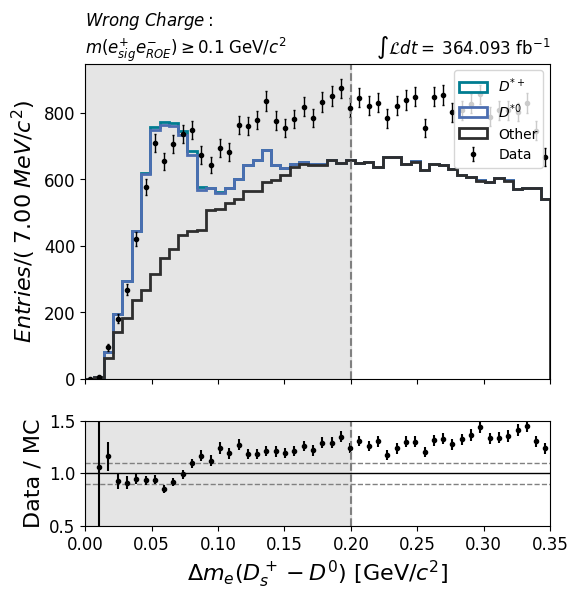

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
Stacked = True
Density = False
Bins = 50
Range = [0.0, 0.35]
perBin = ((Range[1] - Range[0]) / Bins) * 1000  # MeV
print("Width Per Bin: {:.2f} MeV".format(perBin))

# === Plot & Cut Variables ===
plot_var = 'Ds_massDifference_0'
gammaveto_var = 'Ds_gammaveto_M_Correction'
pdg_var = 'Ds_mcPDG'
gammaveto_cut = 0.1

# === Luminosity ===
lum_data = 364.093   # fb⁻¹
lum_MC = 1443.999    # fb⁻¹
scale_factor = lum_data / lum_MC
figsize = (6, 6)

# === DataFrames ===
df_data_all = DataFrames["Data_WCh"]
df_mc_all = DataFrames["All_WCh"]

# === Apply only gamma veto
df_data_all = df_data_all[df_data_all[gammaveto_var] > gammaveto_cut]
df_mc_all = df_mc_all[df_mc_all[gammaveto_var] > gammaveto_cut]

# === MC categories in desired stacking order
df_mc_other = df_mc_all[(abs(df_mc_all[pdg_var]) != 413) & (abs(df_mc_all[pdg_var]) != 423)]
df_mc_dstar0 = df_mc_all[abs(df_mc_all[pdg_var]) == 423]
df_mc_dstarp = df_mc_all[abs(df_mc_all[pdg_var]) == 413]

mc_categories_ordered = [
    ("Other", df_mc_other),
    (r"$D^{*0}$", df_mc_dstar0),
    (r"$D^{*+}$", df_mc_dstarp),
]
mc_colors_ordered = ["#2E2E2E", "#4C6EB1", "#007C91"]

# === Histogram edges and bin centers
edges = np.linspace(Range[0], Range[1], Bins + 1)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# === Clean data
data_vals = df_data_all[plot_var].replace([np.inf, -np.inf], np.nan).dropna()
hist_data, _ = np.histogram(data_vals, bins=edges)
err_data = np.sqrt(hist_data)

# === MC values per category
mc_vals_list = []
for _, df_cat in mc_categories_ordered:
    vals = df_cat[plot_var].replace([np.inf, -np.inf], np.nan).dropna()
    mc_vals_list.append(vals)

# === Total MC for ratio
mc_all_vals = np.concatenate(mc_vals_list)
hist_mc_raw, _ = np.histogram(mc_all_vals, bins=edges)
hist_mc = scale_factor * hist_mc_raw
err_mc = scale_factor * np.sqrt(hist_mc_raw)

# === Ratio and error
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = hist_data / hist_mc
    ratio[np.isnan(ratio)] = 0
    ratio[np.isinf(ratio)] = 0

    err_ratio = ratio * np.sqrt(
        (err_data / np.maximum(hist_data, 1e-10))**2 +
        (err_mc / np.maximum(hist_mc, 1e-10))**2
    )
    err_ratio[np.isnan(err_ratio)] = 0
    err_ratio[np.isinf(err_ratio)] = 0

# === Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=figsize, gridspec_kw={"height_ratios": [3, 1]})

# === Top panel: stacked MC + data
ax1.hist(mc_vals_list,
         bins=edges,
         histtype='step',
         stacked=True,
         color=mc_colors_ordered,
         label=[name for name, _ in mc_categories_ordered],
         weights=[np.full(len(vals), scale_factor) for vals in mc_vals_list],
         linewidth=2)

ax1.errorbar(bin_centers, hist_data, yerr=err_data, fmt='o', color='black',
             markersize=3, label="Data", capsize=1, elinewidth=1)

ax1.set_ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin))
ax1.set_xlim(Range)
ax1.set_title(r"$Wrong \; Charge:$" + "\n" +
              r'$m(e_{sig}^{+} e_{ROE}^{-}) \geq 0.1 \; \mathrm{GeV}/c^{2}$',
              loc="left")
ax1.set_title(r"$\int\mathcal{L}dt =\;364.093$ fb$^{-1}$", loc="right")
ax1.legend(loc="upper right", fontsize=10)

# === Ratio panel
ax2.axhline(1.0, color='black', lw=1)
ax2.axhline(1.1, color='gray', lw=1, ls='dashed')
ax2.axhline(0.9, color='gray', lw=1, ls='dashed')
ax2.errorbar(bin_centers, ratio, yerr=err_ratio, fmt='o', color='black', markersize=3)
ax2.set_ylabel("Data / MC")
ax2.set_xlabel(r"$\Delta m_{e}(D_s^+ - D^0)$ [GeV/$c^2$]")
ax2.set_xlim(Range)
ax2.set_ylim(0.5, 1.5)

# === Visual guides
ax1.axvspan(Range[0], 0.2, color='gray', alpha=0.2)
ax1.axvline(0.2, ls='--', color='gray')
ax2.axvspan(Range[0], 0.2, color='gray', alpha=0.2)
ax2.axvline(0.2, ls='--', color='gray')

plt.show()

Width Per Bin: 0.02

Plotting variable: Ds_FakeD0BDT


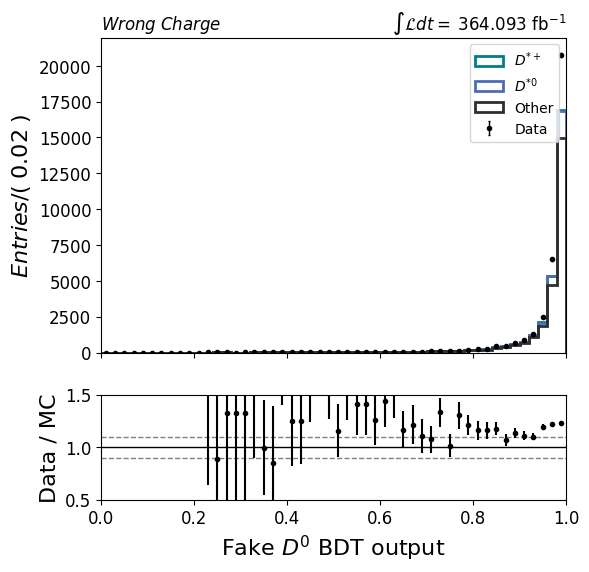


Plotting variable: Ds_BkgBDT


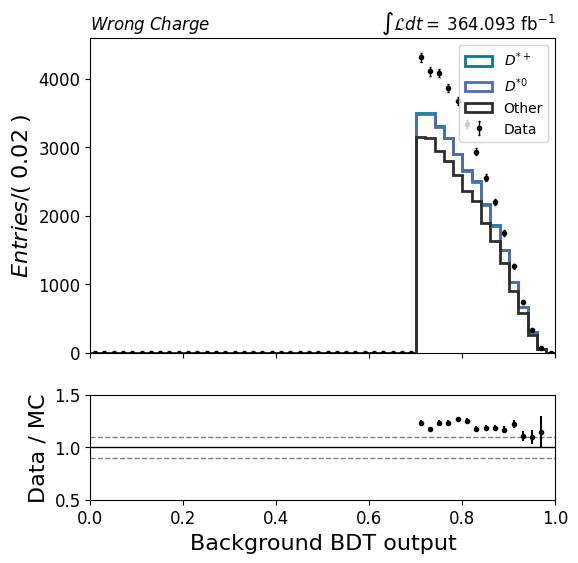

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
bdt_vars = ['Ds_FakeD0BDT', 'Ds_BkgBDT']
xlabels = {
    "Ds_FakeD0BDT": r"Fake $D^0$ BDT output",
    "Ds_BkgBDT": r"Background BDT output"
}
Range = [0.0, 1.0]
Bins = 50
perBin = ((Range[1] - Range[0]) / Bins)
print("Width Per Bin: {:.2f}".format(perBin))

lum_data = 364.093   # fb⁻¹
lum_MC = 1443.999    # fb⁻¹
scale_factor = lum_data / lum_MC
figsize = (6, 6)

# === DataFrames and category split ===
df_data = DataFrames["Data_WCh"]
df_mc_all = DataFrames["All_WCh"]
pdg_var = "Ds_mcPDG"

df_mc_other = df_mc_all[(abs(df_mc_all[pdg_var]) != 413) & (abs(df_mc_all[pdg_var]) != 423)]
df_mc_dstar0 = df_mc_all[abs(df_mc_all[pdg_var]) == 423]
df_mc_dstarp = df_mc_all[abs(df_mc_all[pdg_var]) == 413]

mc_categories_ordered = [
    ("Other", df_mc_other),
    (r"$D^{*0}$", df_mc_dstar0),
    (r"$D^{*+}$", df_mc_dstarp),
]
mc_colors_ordered = ["#2E2E2E", "#4C6EB1", "#007C91"]

# === Loop over variables ===
for plot_var in bdt_vars:
    print(f"\nPlotting variable: {plot_var}")
    
    # === Histogram edges and bin centers ===
    edges = np.linspace(Range[0], Range[1], Bins + 1)
    bin_centers = 0.5 * (edges[:-1] + edges[1:])

    # === Clean data
    data_vals = df_data[plot_var].replace([np.inf, -np.inf], np.nan).dropna()
    hist_data, _ = np.histogram(data_vals, bins=edges)
    err_data = np.sqrt(hist_data)

    # === MC per category
    mc_vals_list = []
    for _, df_cat in mc_categories_ordered:
        vals = df_cat[plot_var].replace([np.inf, -np.inf], np.nan).dropna()
        mc_vals_list.append(vals)

    # === Total MC for ratio
    mc_all_vals = np.concatenate(mc_vals_list)
    hist_mc_raw, _ = np.histogram(mc_all_vals, bins=edges)
    hist_mc = scale_factor * hist_mc_raw
    err_mc = scale_factor * np.sqrt(hist_mc_raw)

    # === Ratio calculation
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = hist_data / hist_mc
        ratio[np.isnan(ratio)] = 0
        ratio[np.isinf(ratio)] = 0

        err_ratio = ratio * np.sqrt(
            (err_data / np.maximum(hist_data, 1e-10))**2 +
            (err_mc / np.maximum(hist_mc, 1e-10))**2
        )
        err_ratio[np.isnan(err_ratio)] = 0
        err_ratio[np.isinf(err_ratio)] = 0

    # === Plotting
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=figsize,
                                   gridspec_kw={"height_ratios": [3, 1]})

    # === Top panel: stacked MC + data
    ax1.hist(mc_vals_list,
             bins=edges,
             histtype='step',
             stacked=True,
             color=mc_colors_ordered,
             label=[name for name, _ in mc_categories_ordered],
             weights=[np.full(len(vals), scale_factor) for vals in mc_vals_list],
             linewidth=2)

    ax1.errorbar(bin_centers, hist_data, yerr=err_data, fmt='o',
                 color='black', markersize=3, label="Data",
                 capsize=1, elinewidth=1)

    ax1.set_ylabel(r'$Entries/(\;{:.2f}\;)$'.format(perBin))
    ax1.set_xlim(Range)
    ax1.set_title(r"$Wrong \; Charge$", loc="left")
    ax1.set_title(r"$\int\mathcal{L}dt =\;364.093$ fb$^{-1}$", loc="right")
    ax1.legend(loc="upper right", fontsize=10)

    # === Ratio panel
    ax2.axhline(1.0, color='black', lw=1)
    ax2.axhline(1.1, color='gray', lw=1, ls='dashed')
    ax2.axhline(0.9, color='gray', lw=1, ls='dashed')
    ax2.errorbar(bin_centers, ratio, yerr=err_ratio, fmt='o',
                 color='black', markersize=3)
    ax2.set_ylabel("Data / MC")
    ax2.set_xlabel(xlabels[plot_var])
    ax2.set_xlim(Range)
    ax2.set_ylim(0.5, 1.5)

    plt.show()

Loop over all Variables

In [27]:
# import numpy as np
# import matplotlib.pyplot as plt

# # === Settings ===
# Bins = 50
# Range = None
# Density = False
# lum_data = 364.093   # fb⁻¹
# lum_MC = 1443.999    # fb⁻¹
# scale_factor = lum_data / lum_MC
# color_mc = "#007C91"
# color_data = "#2E2E2E"
# exclude_columns = ["__eventType__"]
# figsize = (6, 6)

# # === DataFrames ===
# df_mc_base = DataFrames["All_WCh"][DataFrames["All_WCh"]['Ds_FakeD0BDT']>=0.7]
# df_data_base = DataFrames["Data_WCh"][DataFrames["Data_WCh"]['Ds_FakeD0BDT']>=0.7]

# # === Optional range overrides ===
# xrange_override = {
#     "e_p": (0, 0.8),
#     "pi_p": (0, 1.0),
#     "K_p": (0.1, 1.0),  # respect the applied cut
# }

# # === Load variable list from file ===
# with open("/home/belle2/amubarak/Ds2D0enue_Analysis/03-Grid/SignalVsBkg_VariableList.txt", "r") as f:
#     features = [line.strip() for line in f if line.strip()]

# # === Loop through variables ===
# for col in features:
#     if col in exclude_columns:
#         continue
#     if col not in df_mc_base.columns or col not in df_data_base.columns:
#         print(f"Skipping missing variable: {col}")
#         continue
        
#     vals_mc = df_mc_base[col].replace([np.inf, -np.inf], np.nan).dropna()
#     vals_data = df_data_base[col].replace([np.inf, -np.inf], np.nan).dropna()
#     if len(vals_mc) == 0 or len(vals_data) == 0:
#         continue

#     if col in xrange_override:
#         low, high = xrange_override[col]
#     elif (pd.api.types.is_bool_dtype(vals_mc) or vals_mc.dropna().isin([0, 1]).all()) and \
#          (pd.api.types.is_bool_dtype(vals_data) or vals_data.dropna().isin([0, 1]).all()):
#         low, high = -0.5, 1.5
#     else:
#         low = min(np.percentile(vals_mc, 1), np.percentile(vals_data, 1))
#         high = max(np.percentile(vals_mc, 99), np.percentile(vals_data, 99))
#     if low == high:
#         continue

#     edges = np.linspace(low, high, Bins + 1)
#     bin_centers = 0.5 * (edges[:-1] + edges[1:])
#     perBin = (edges[1] - edges[0]) * 1000  # MeV

#     # === Histogram contents
#     hist_data, _ = np.histogram(vals_data, bins=edges, density=Density)
#     hist_mc_raw, _ = np.histogram(vals_mc, bins=edges, density=Density)
#     hist_mc = scale_factor * hist_mc_raw
#     err_data = np.sqrt(hist_data)
#     err_mc = scale_factor * np.sqrt(hist_mc_raw)

#     with np.errstate(divide='ignore', invalid='ignore'):
#         ratio = hist_data / hist_mc
#         ratio[np.isnan(ratio)] = 0
#         ratio[np.isinf(ratio)] = 0
#         err_ratio = ratio * np.sqrt(
#             (err_data / np.maximum(hist_data, 1e-10))**2 +
#             (err_mc / np.maximum(hist_mc, 1e-10))**2
#         )
#         err_ratio[np.isnan(err_ratio)] = 0
#         err_ratio[np.isinf(err_ratio)] = 0

#     # === Plotting
#     fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=figsize,
#                                    gridspec_kw={"height_ratios": [3, 1]})

#     ax1.hist(vals_mc, bins=edges, histtype='step', color=color_mc,
#              linewidth=2, label="MC", density=Density,
#              weights=np.full(len(vals_mc), scale_factor))
#     ax1.errorbar(bin_centers, hist_data, yerr=err_data, fmt='o',
#                  color='black', markersize=3, label="Data",
#                  capsize=1, elinewidth=1)

#     ax1.set_ylabel(r'$Entries/(\;{:.2f}\;MeV/c^2)$'.format(perBin))
#     ax1.set_xlim([low, high])
#     ax1.set_title(f"{col} — Wrong-Charge: Data vs MC", loc="left")
#     ax1.legend(loc="upper right", fontsize=10)

#     ax2.axhline(1.0, color='black', lw=1)
#     ax2.axhline(1.1, color='gray', lw=1, ls='dashed')
#     ax2.axhline(0.9, color='gray', lw=1, ls='dashed')
#     ax2.errorbar(bin_centers, ratio, yerr=err_ratio, fmt='o',
#                  color='black', markersize=3)
#     ax2.set_ylabel("Data / MC")
#     ax2.set_xlabel(col)
#     ax2.set_xlim([low, high])
#     ax2.set_ylim(0.5, 1.5)

#     plt.show()